In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [74]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  20141013T000000  221900.0         3       1.00         1180  \
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      5650     1.0           0     0  ...      7      1180.0              0  \
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      1955             0    98178  47.5112 -122.257           1340  \
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [75]:
# count of missing values by columns
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [76]:
# some fast overview analysis of data
df.describe().transpose()

count          mean           std           min   
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06  \
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21611.0  1.788396e+03  8.281282e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

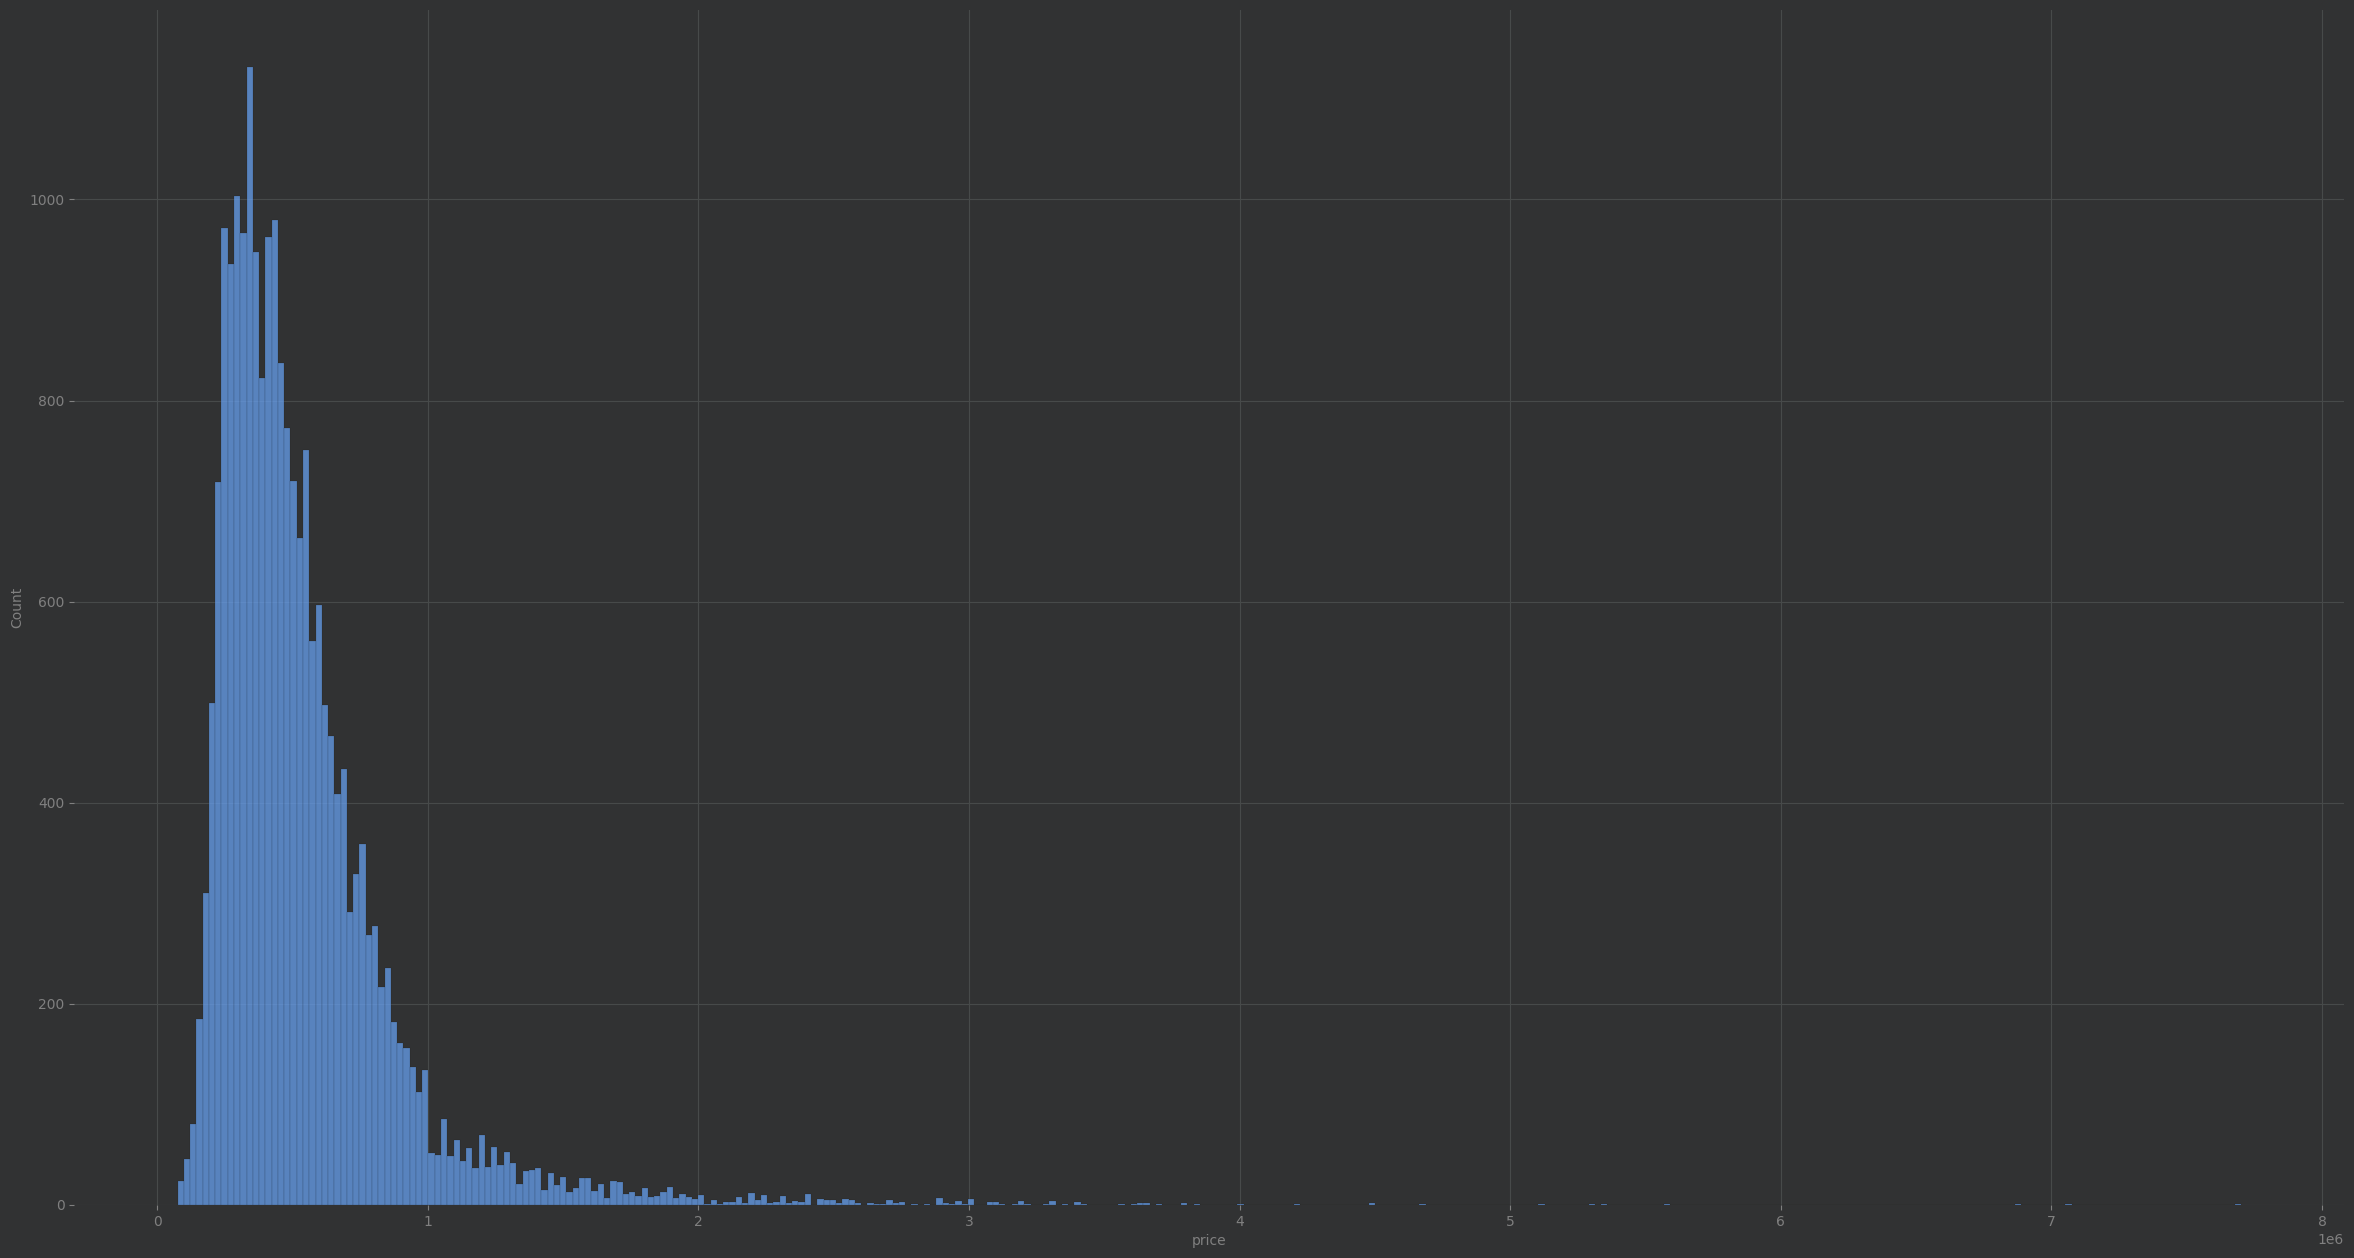

In [77]:
# check price
dis_plot_price = sns.displot(data=df['price'])
fig = dis_plot_price.fig
fig.set_size_inches(28, 14)
plt.show()

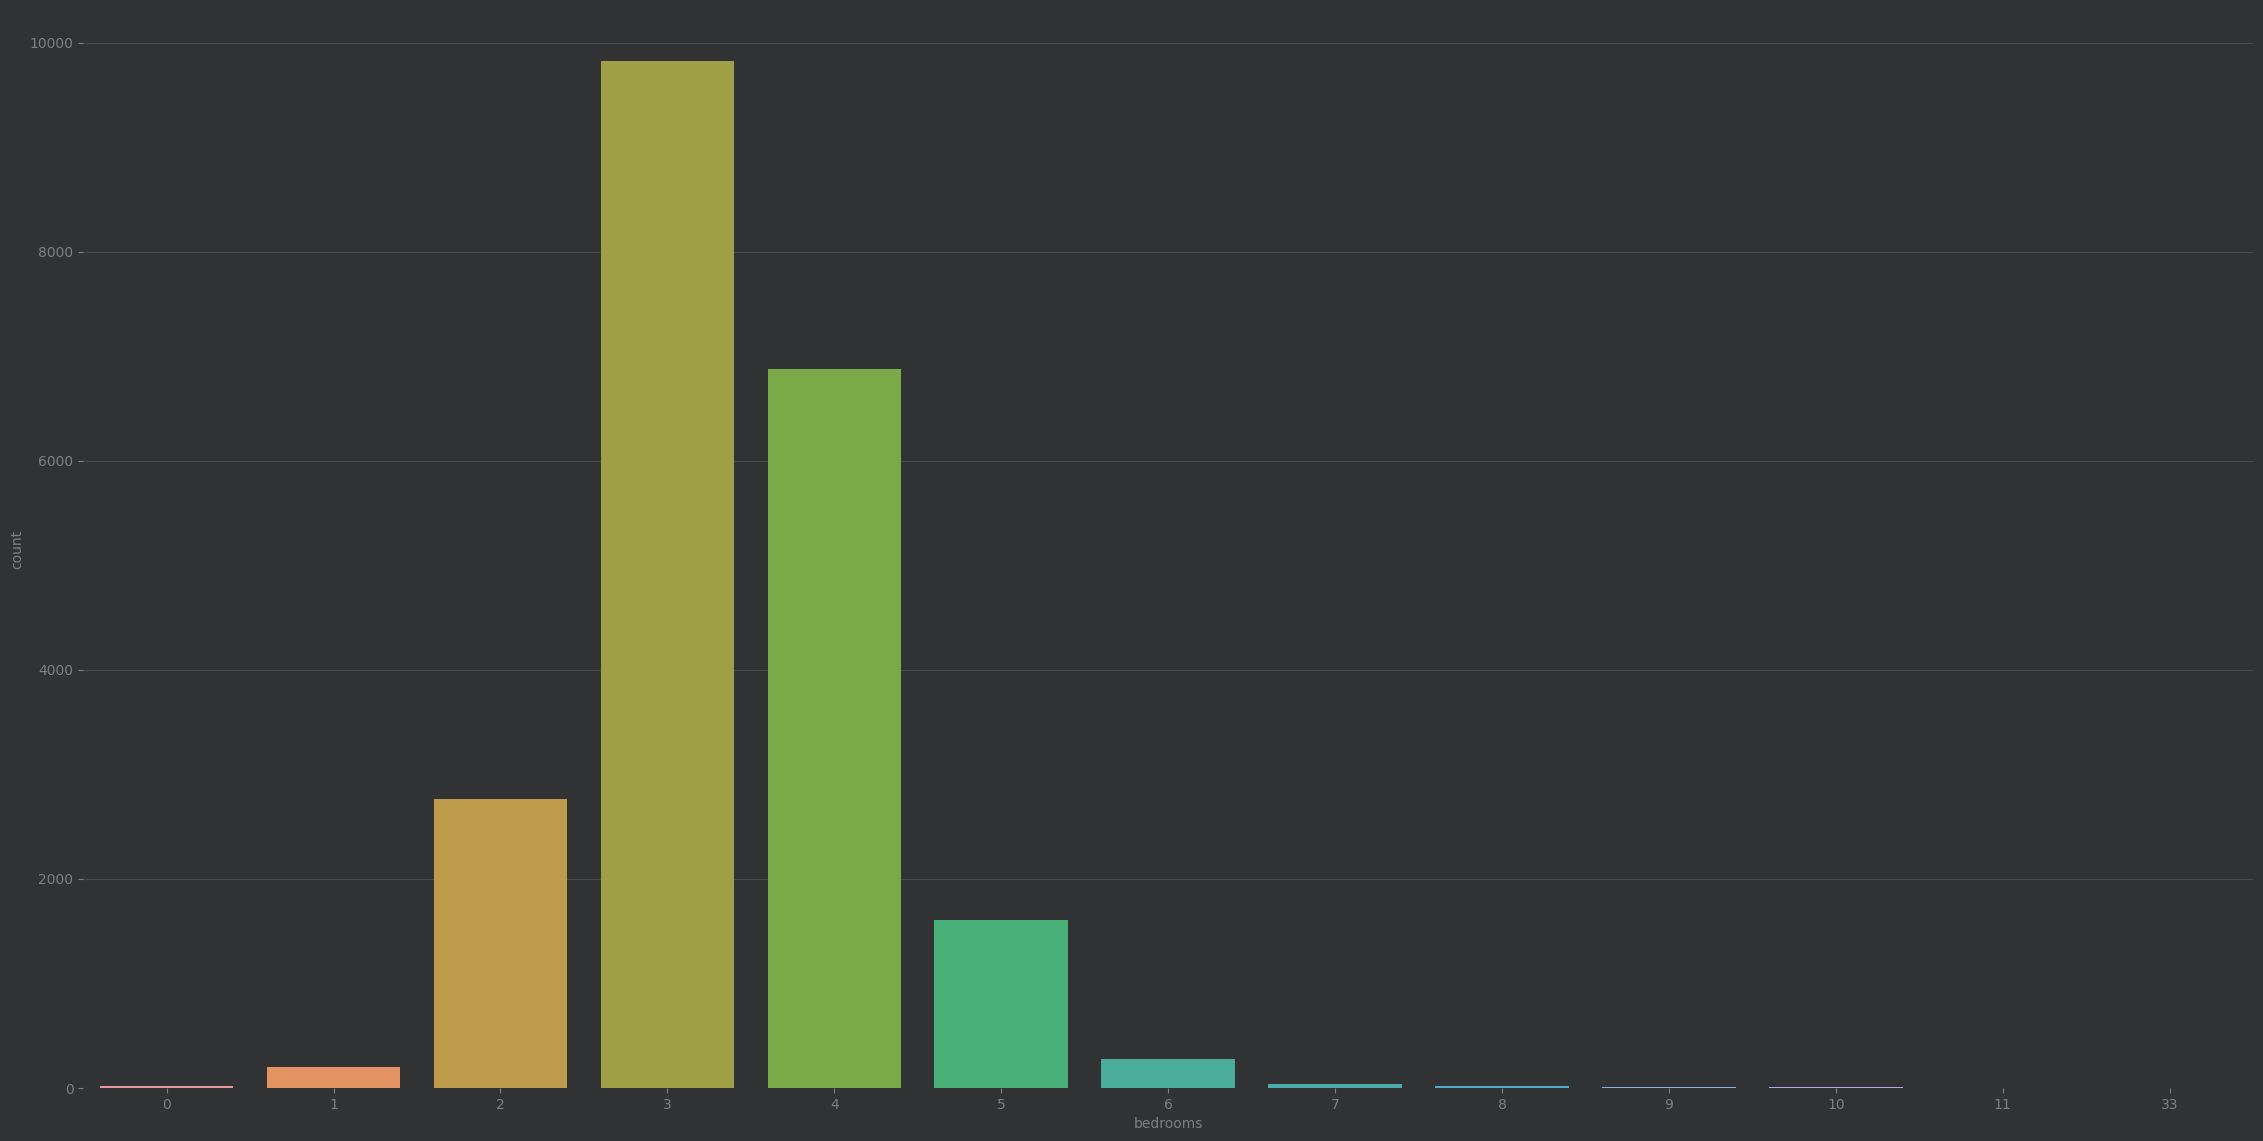

In [78]:
# check bedrooms
count_plot_bedrooms = sns.countplot(data=df, x='bedrooms')
fig = count_plot_bedrooms.figure
fig.set_size_inches(28, 14)
plt.show()

In [79]:
# identify features that correlates with price, we have a stron correlatiion of price with sqft_living which is 0.70
df_corr = df.drop('date', axis=1)
df_corr.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

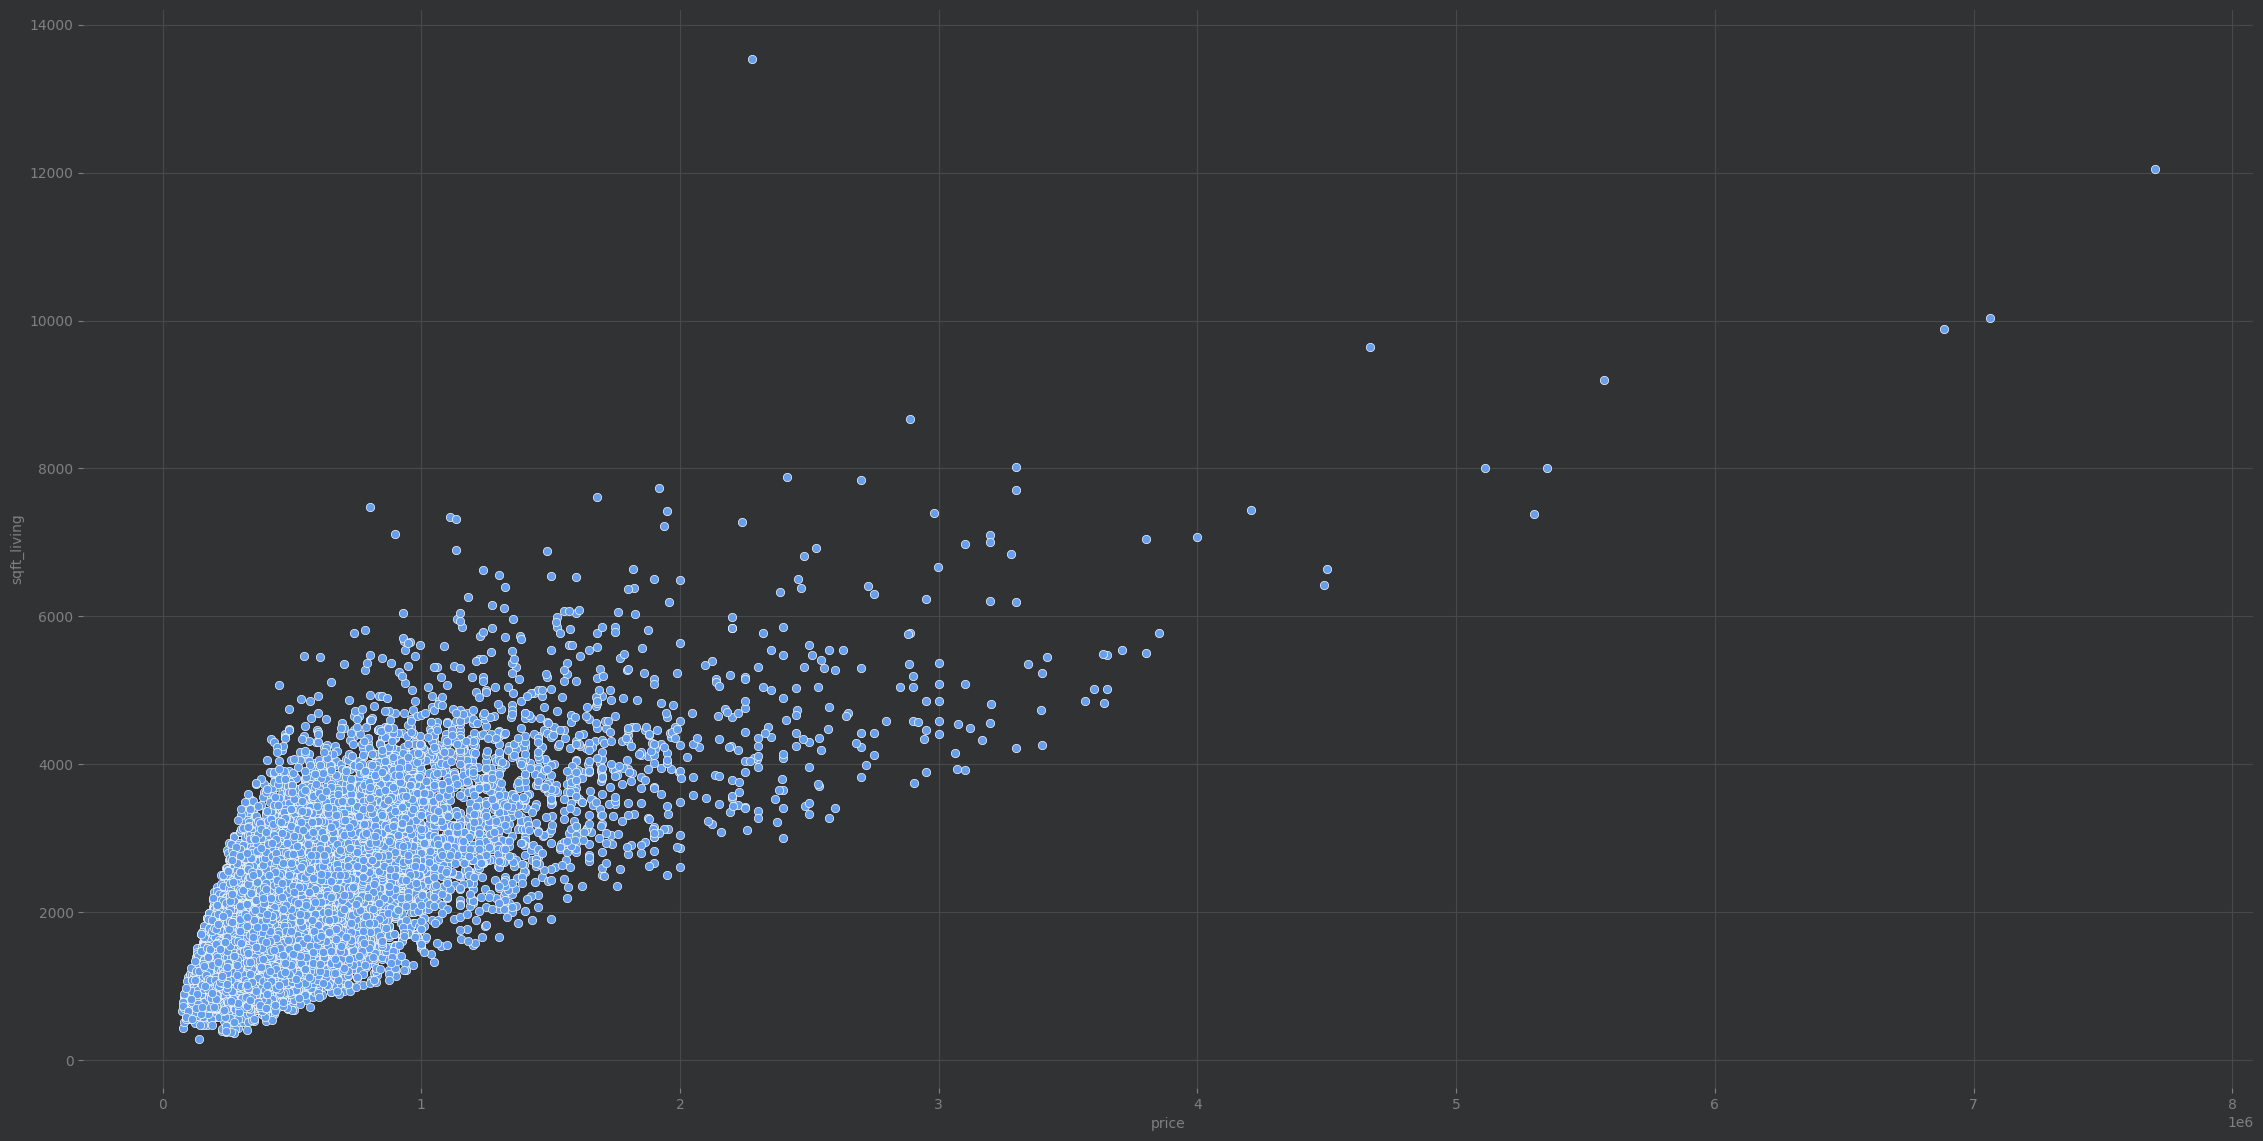

In [80]:
# plot the price vs sqft_living
scatter_plot_price_sqft = sns.scatterplot(data=df, x='price', y='sqft_living')
fig = scatter_plot_price_sqft.figure
fig.set_size_inches(28, 14)
plt.show()

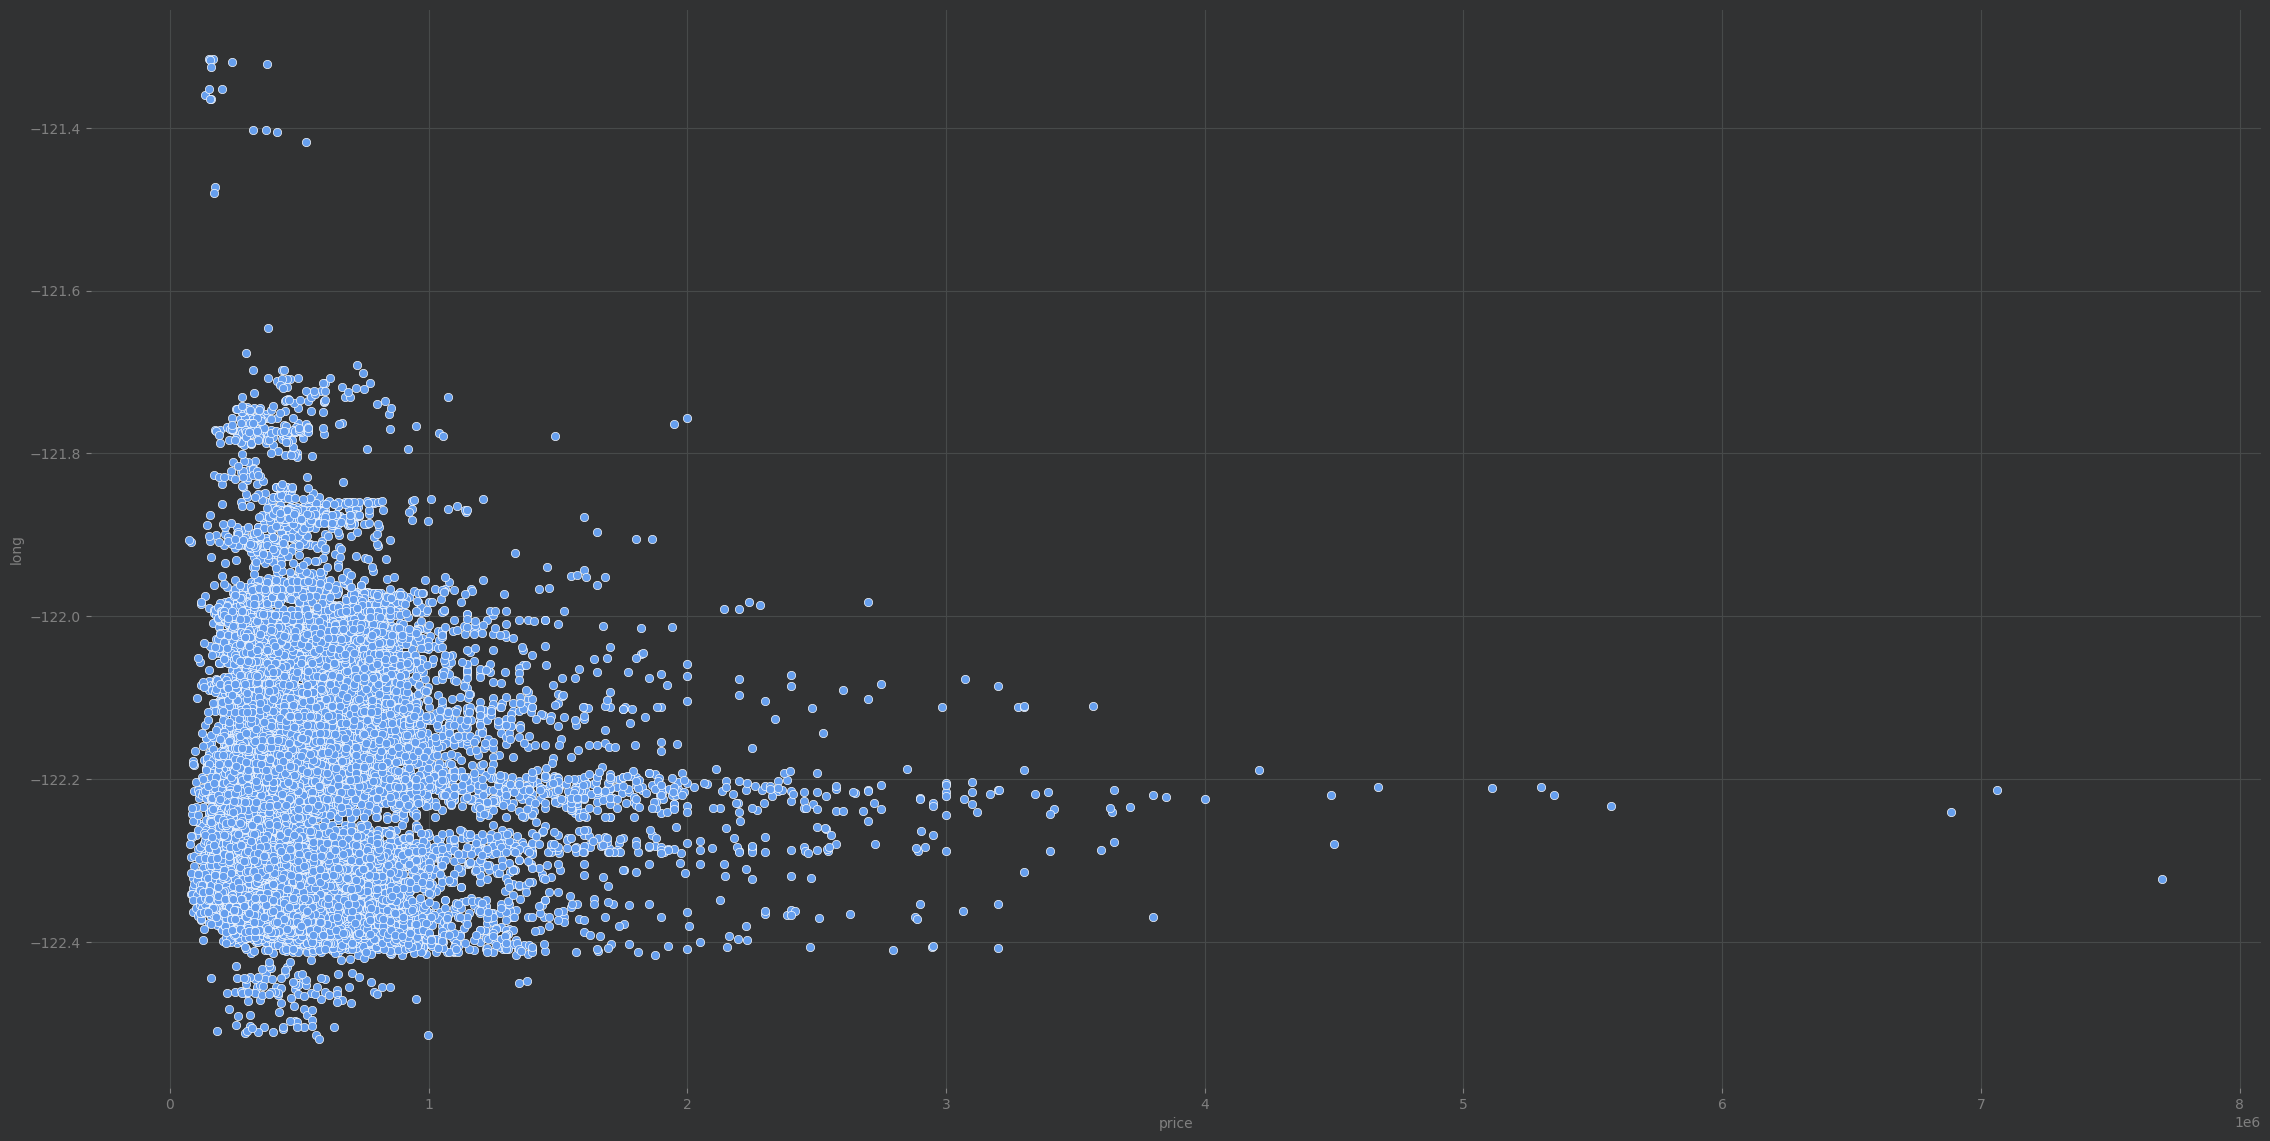

In [81]:
# distribution of prices by longitude
scatter_plot_price_long = sns.scatterplot(data=df, x='price', y='long')
fig = scatter_plot_price_long.figure
fig.set_size_inches(28, 14)
plt.show()

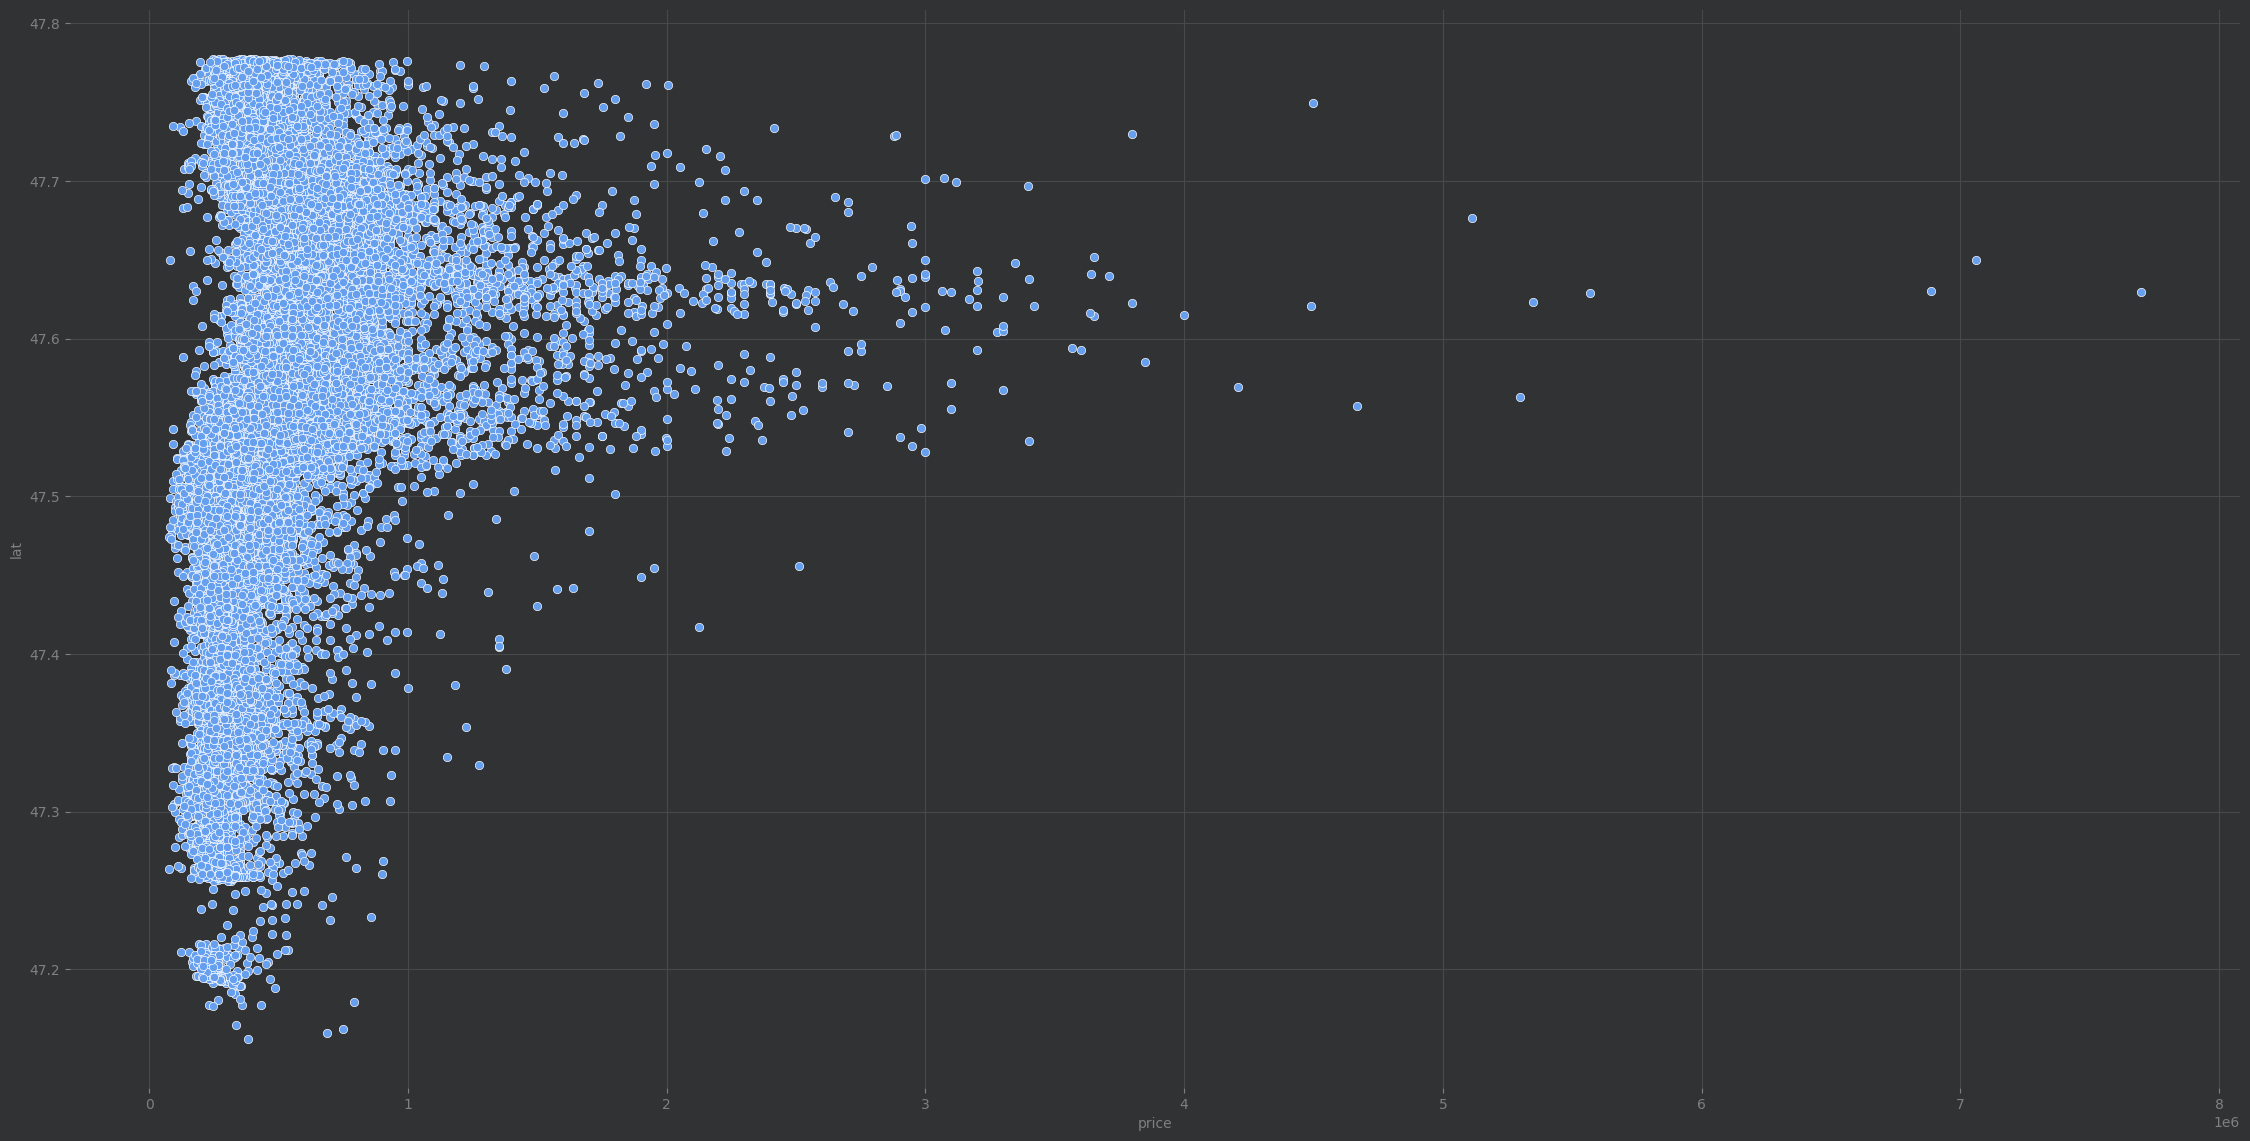

In [82]:
# distribution of prices by latitude
scatter_plot_price_lat = sns.scatterplot(data=df, x='price', y='lat')
fig = scatter_plot_price_lat.figure
fig.set_size_inches(28, 14)
plt.show()

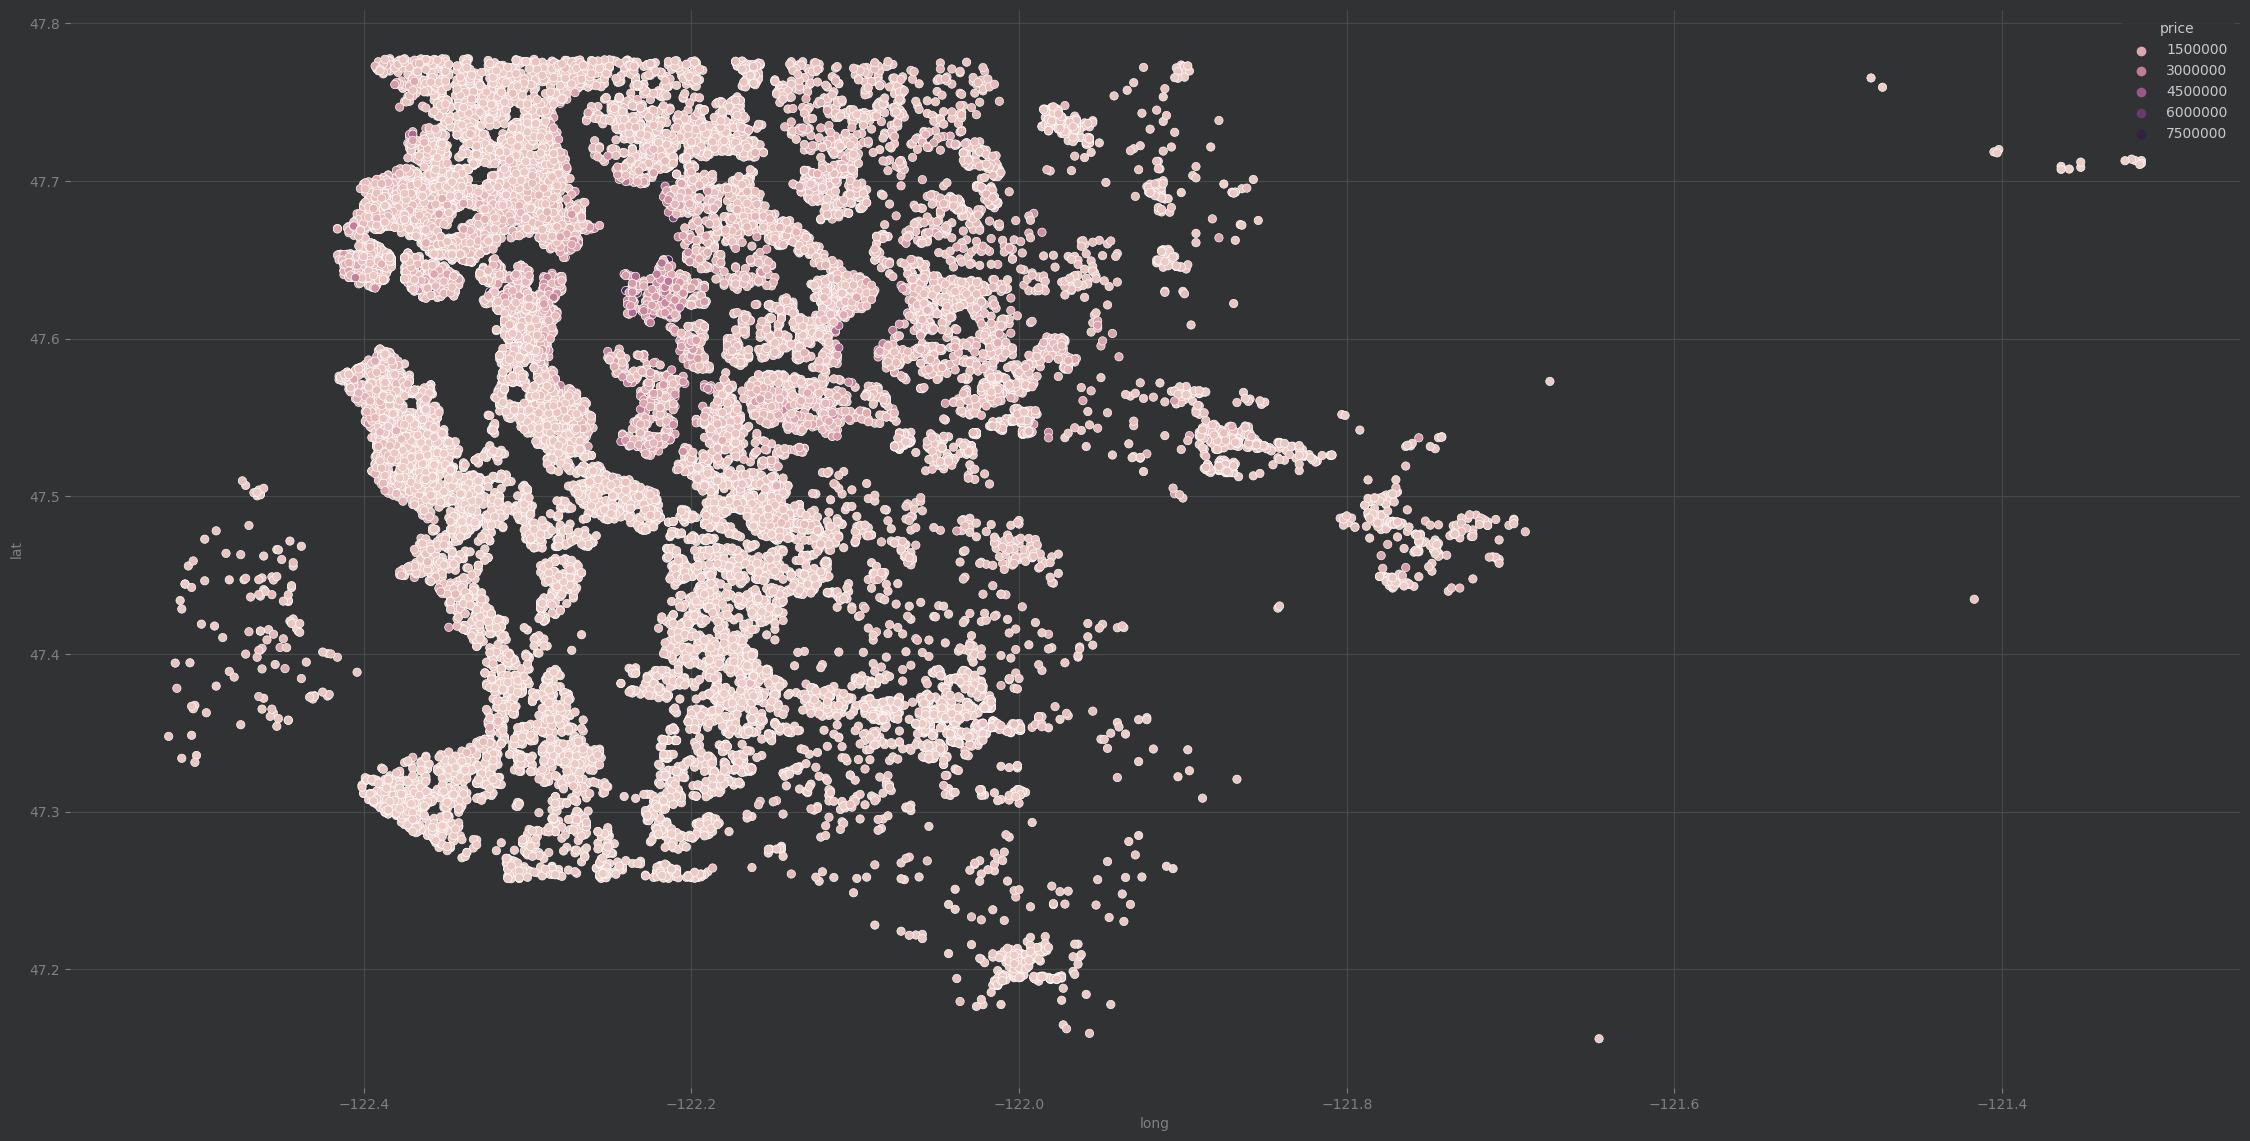

In [83]:
# check for latitude and longitude by price, almost getting the point on map king county
scatter_plot_lat_long = sns.scatterplot(data=df, x='long', y='lat', hue='price', )
fig = scatter_plot_lat_long.figure
fig.set_size_inches(28, 14)
plt.show()

In [84]:
# excluding top 1% of the houses by price, expensive ones
df_cheap_houses = df.sort_values('price', ascending=False).iloc[216:]
df_cheap_houses.head()

id             date      price  bedrooms  bathrooms   
3281   8964800025  20150226T000000  1965000.0         5       3.75  \
12577  2806300065  20150422T000000  1960000.0         4       4.00   
12283  1923000260  20141015T000000  1959000.0         5       4.50   
1152   4055701200  20150421T000000  1955000.0         4       2.75   
9175   3124059023  20150213T000000  1955000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade   
3281          3940     13738     1.5           0     3  ...      9  \
12577         4430     31353     2.0           0     0  ...     12   
12283         6200     23373     3.0           0     1  ...     11   
1152          3120      7898     1.0           1     4  ...      8   
9175          3330     12566     1.0           1     4  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat   
3281       3940.0              0      1951             0    98004  47.6203  \
12577      4430.0              0      1998             0    98005  47.6422   
12283      5050.0           1150      1988             0    98040  47.5632   
1152       1560.0           1560      1963             0    98034  47.7165   
9175       1940.0           1390      1960             0    98040  47.5287   

          long  sqft_living15  sqft_lot15  
3281  -122.212           2370       13320  
12577 -122.157           3900       35237  
12283 -122.215           3700       14486  
1152  -122.259           2630       13868  
9175  -122.220           3730       16560  

[5 rows x 21 columns]

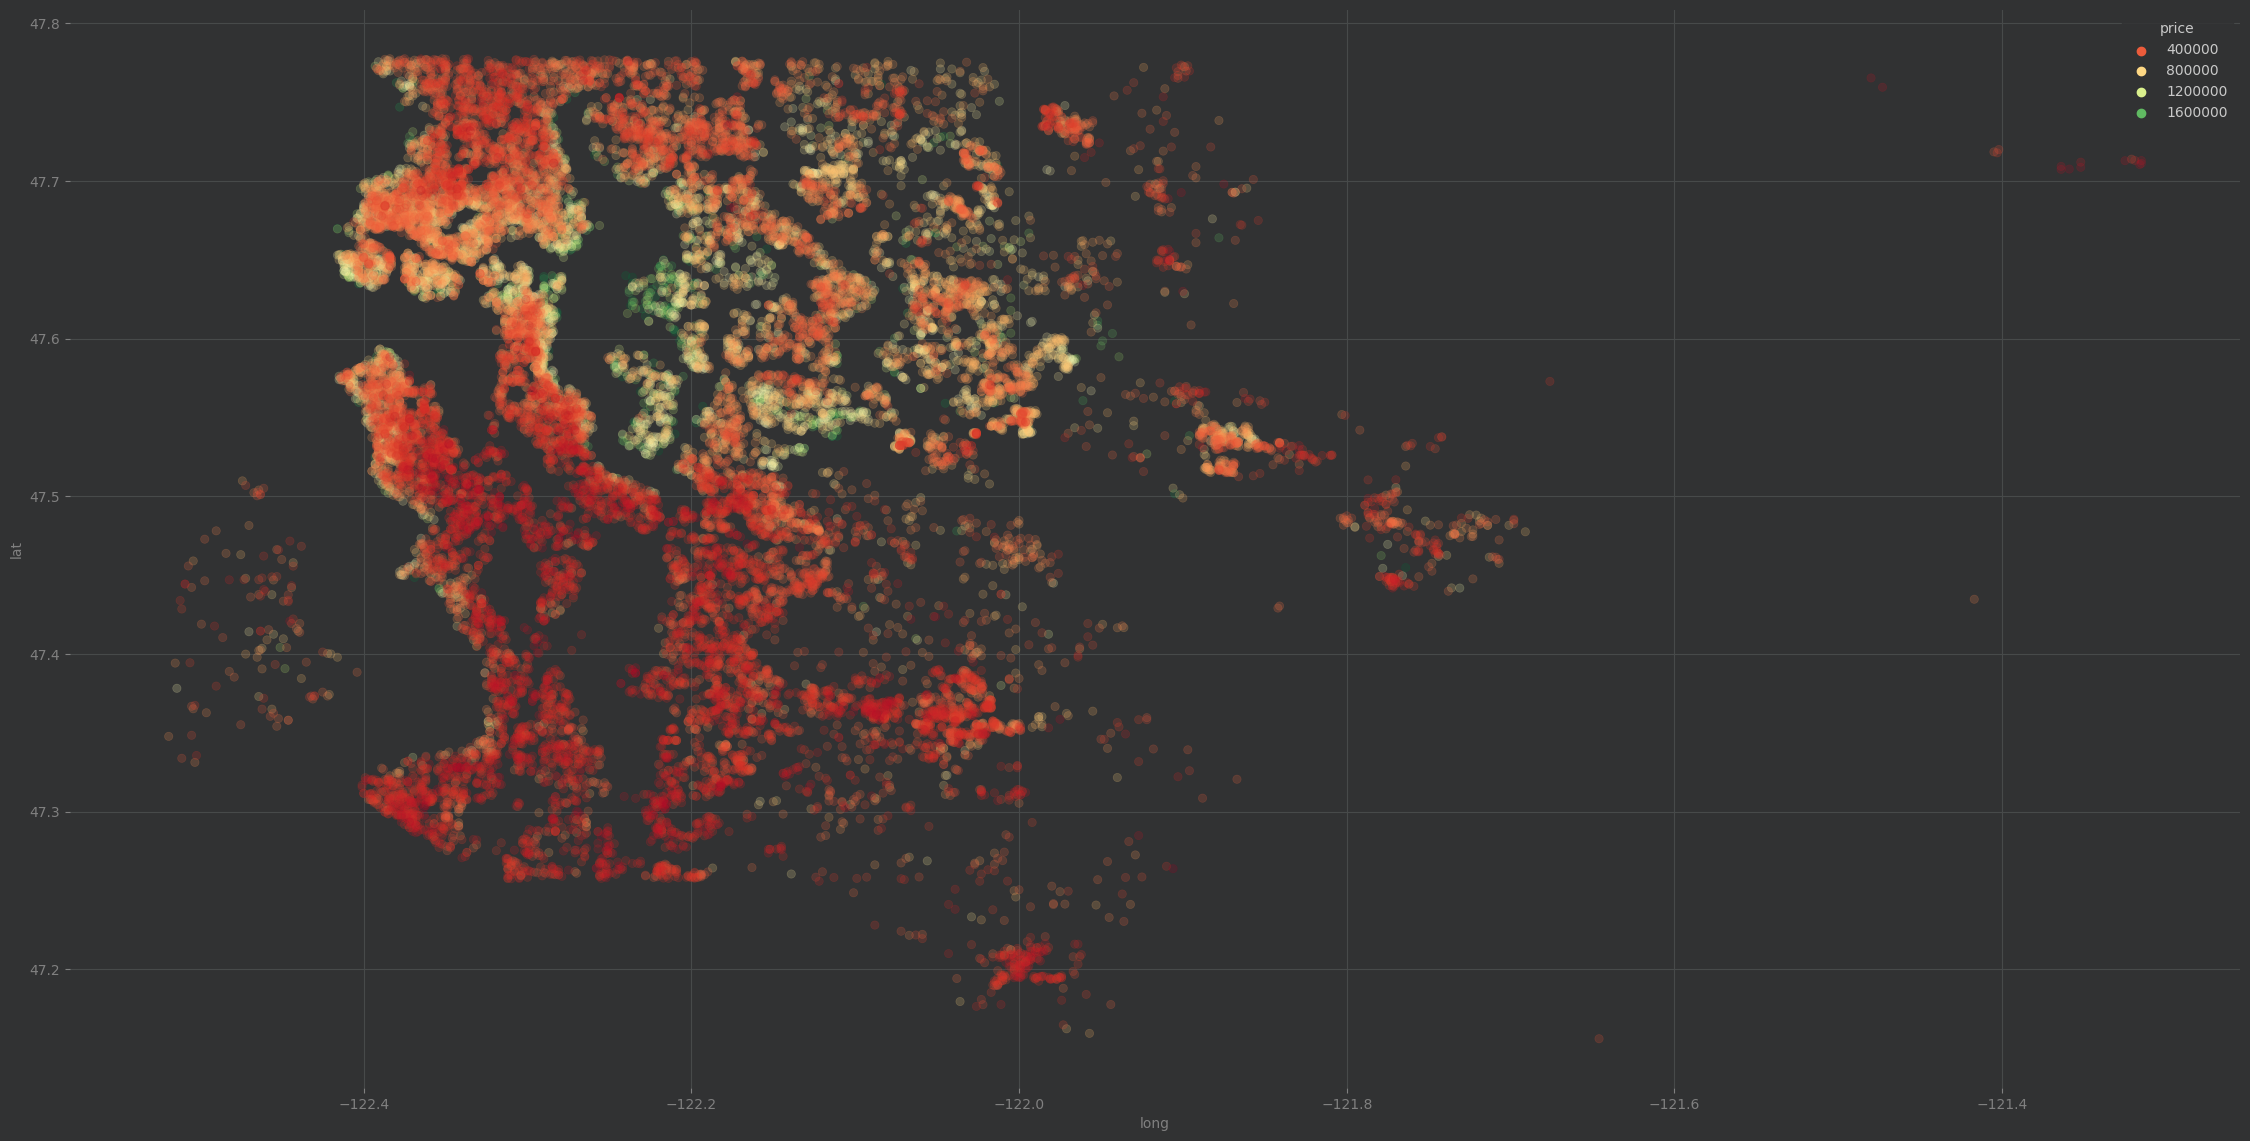

In [85]:
# excluding top 1% of the houses by price, expensive ones
scatter_plot_lat_long = sns.scatterplot(data=df_cheap_houses, x='long', y='lat', hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')
fig = scatter_plot_lat_long.figure
fig.set_size_inches(28, 14)
plt.show()

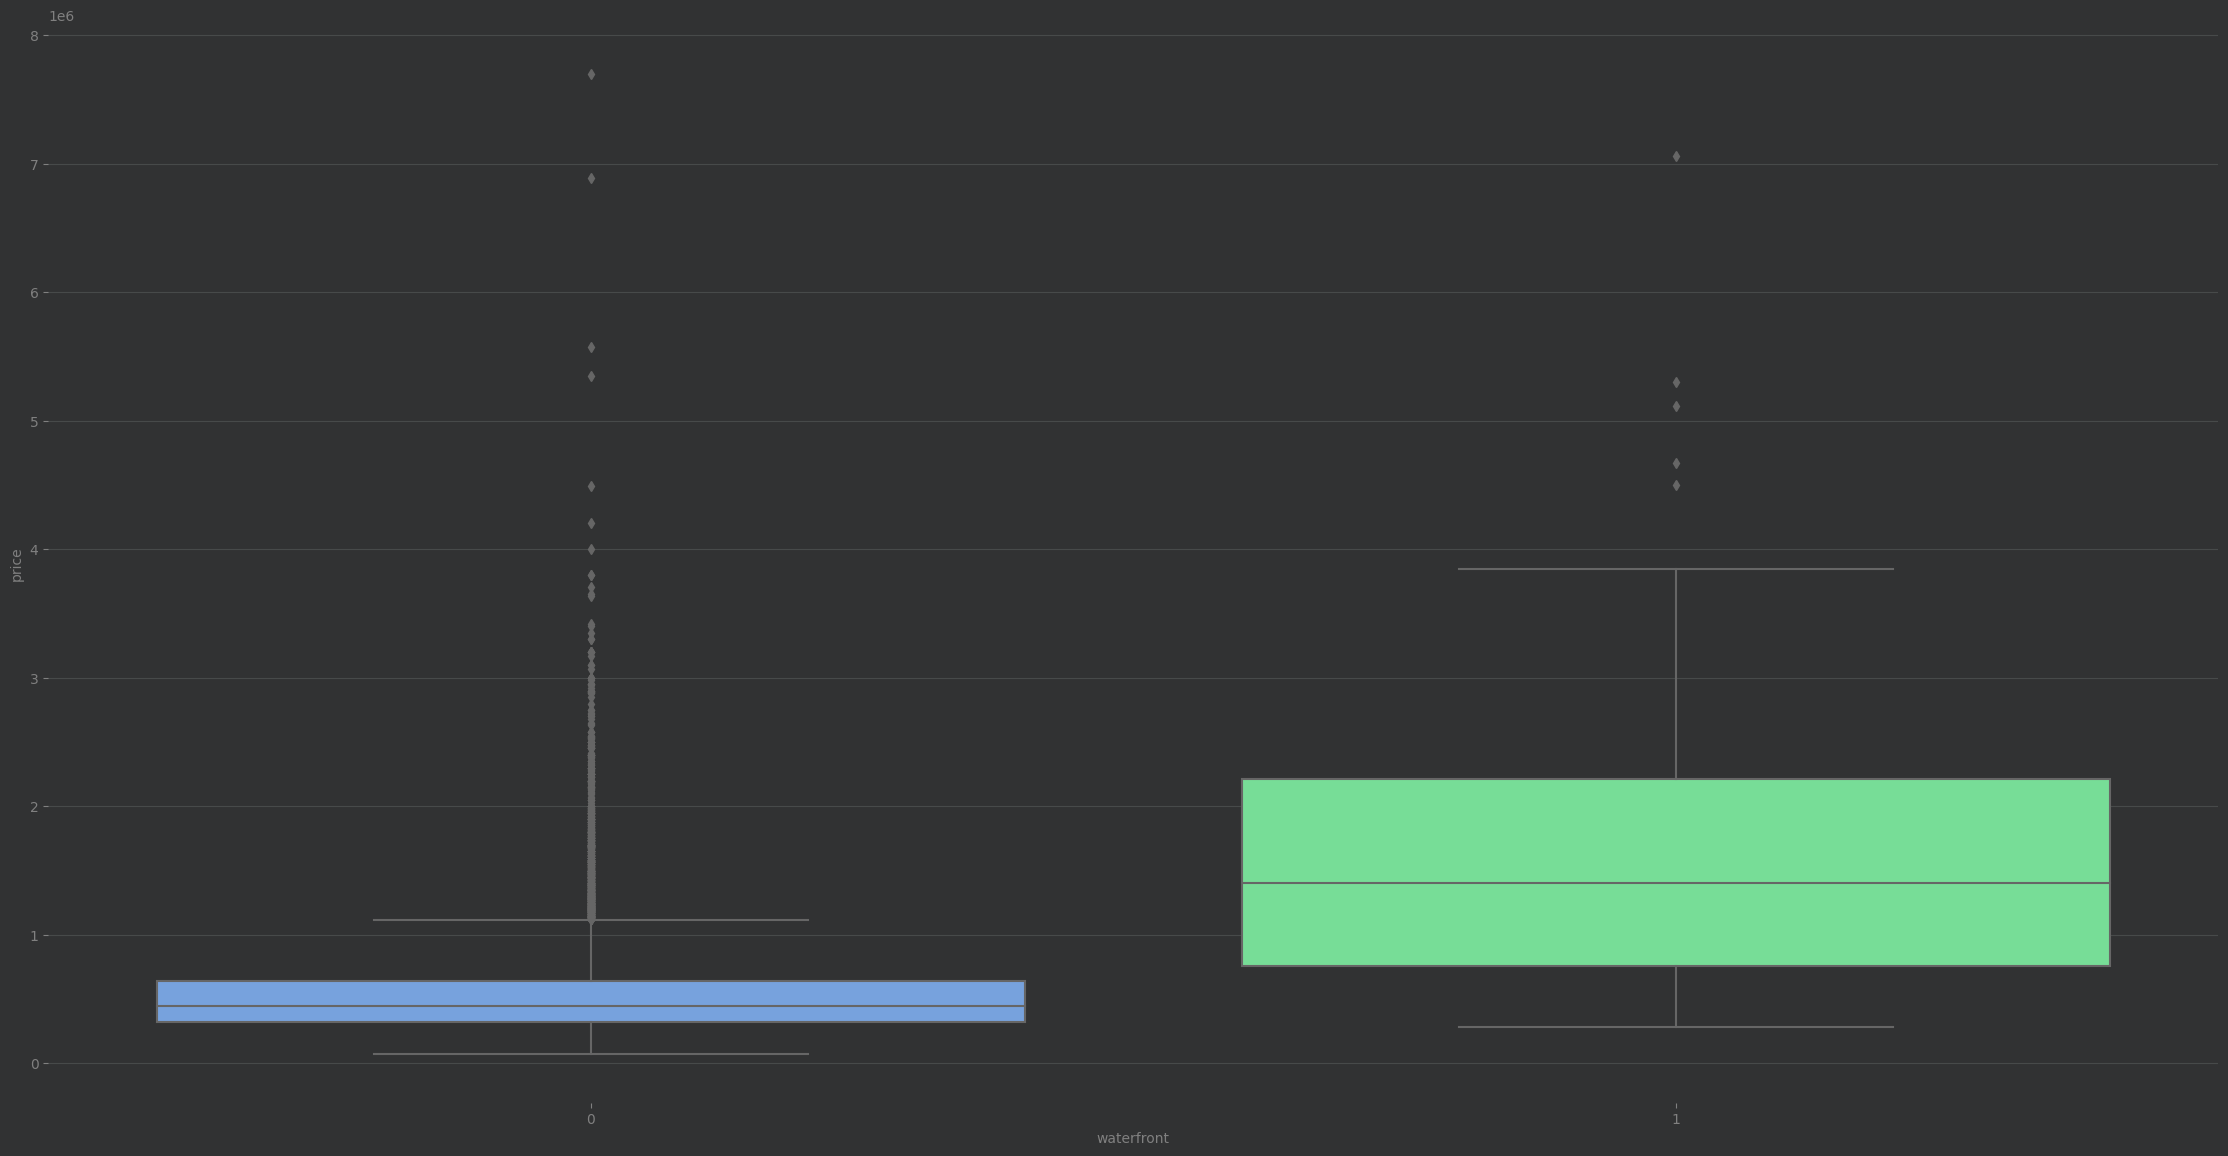

In [86]:
# check price by waterfront position of the house, more expensive houses with waterfront position
box_plot_price_waterfront = sns.boxplot(data=df, x='waterfront', y='price')
fig = box_plot_price_waterfront.figure
fig.set_size_inches(28, 14)
plt.show() 

In [87]:
# drop unnecessary features
df = df.drop('id', axis=1)

# transform date to date type
df['date'] = pd.to_datetime(df['date'])

# feature engineering, add new columns based on existing ones, for example the date by taking the year, month...
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0  \
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated   
0           0     0          3  ...              0      1955             0  \
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 22 columns]

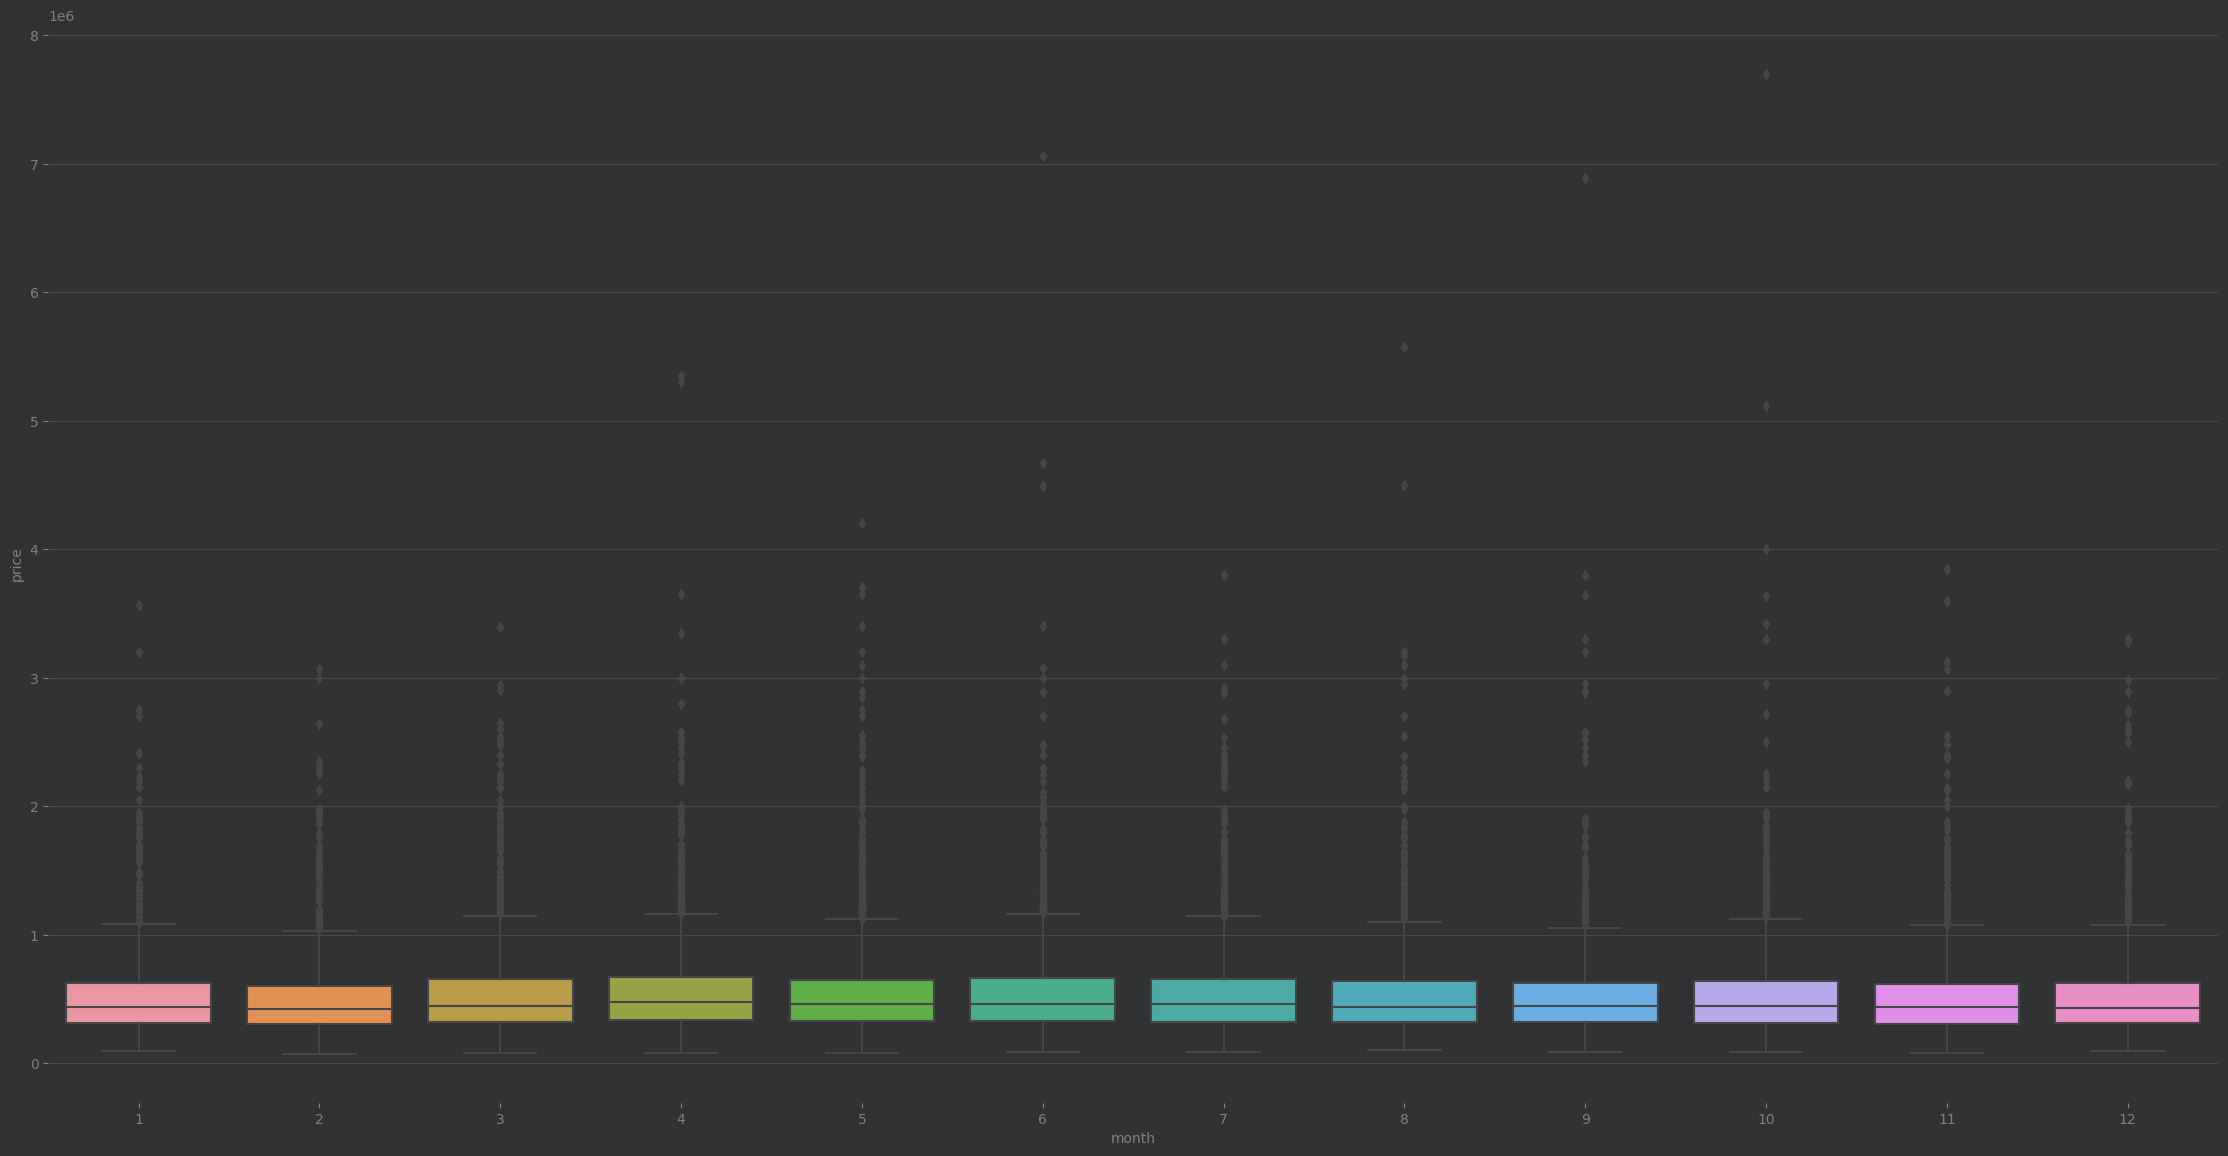

In [88]:
# check price by month
box_plot_price_month = sns.boxplot(data=df, x='month', y='price')
fig = box_plot_price_month.figure
fig.set_size_inches(28, 14)
plt.show() 

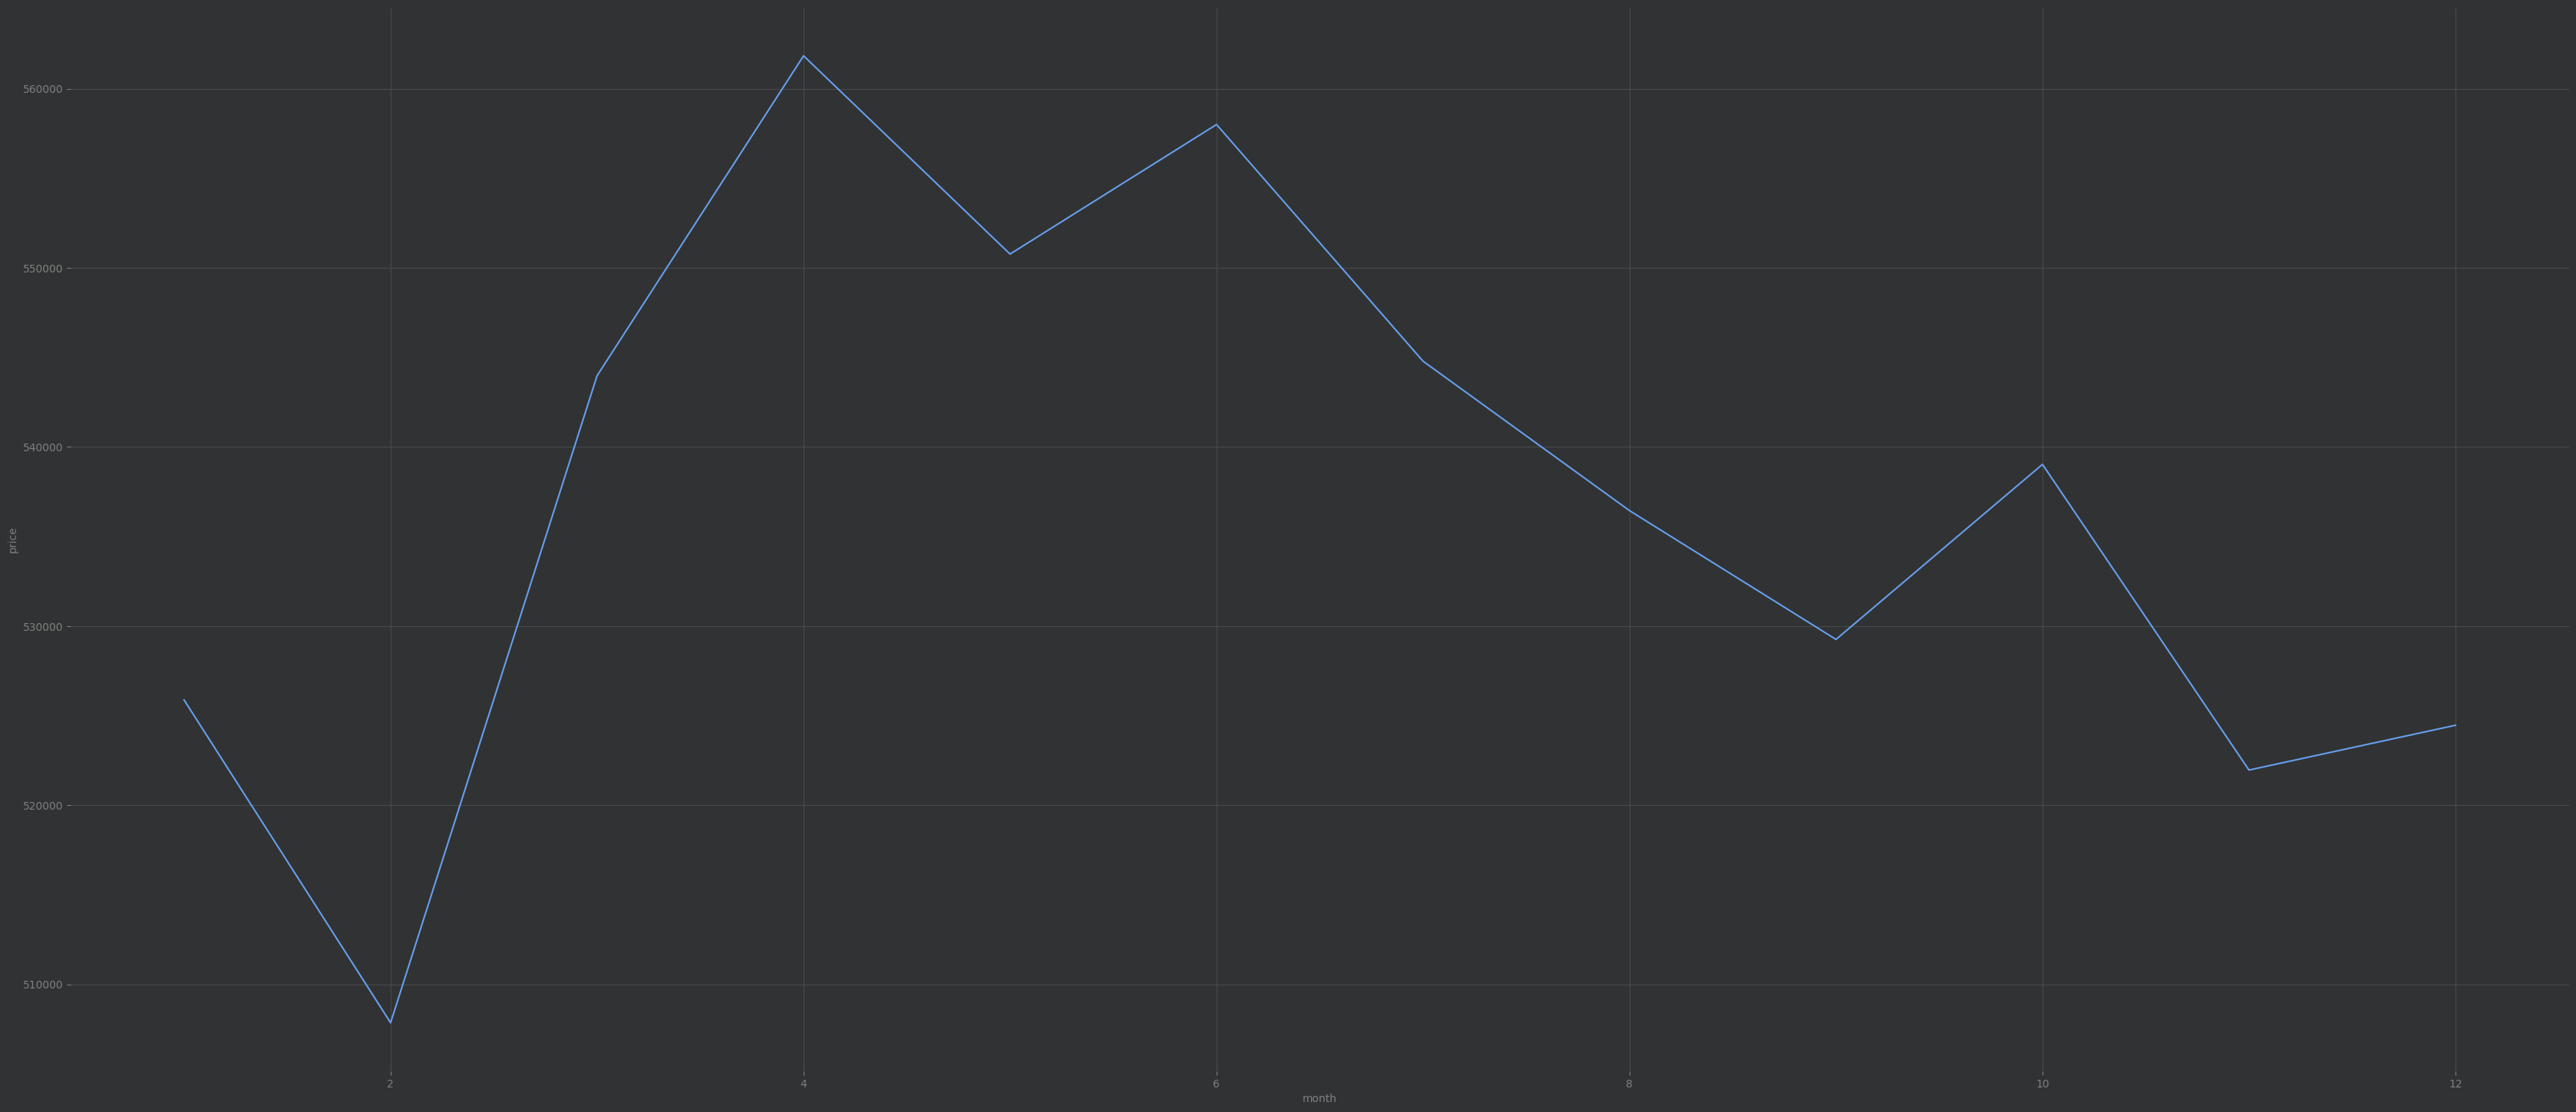

In [89]:
# plot price by month
line_plot_price_month = sns.lineplot(data=df.groupby('month').mean()['price'])
fig = line_plot_price_month.figure
fig.set_size_inches(42, 18)
plt.show()

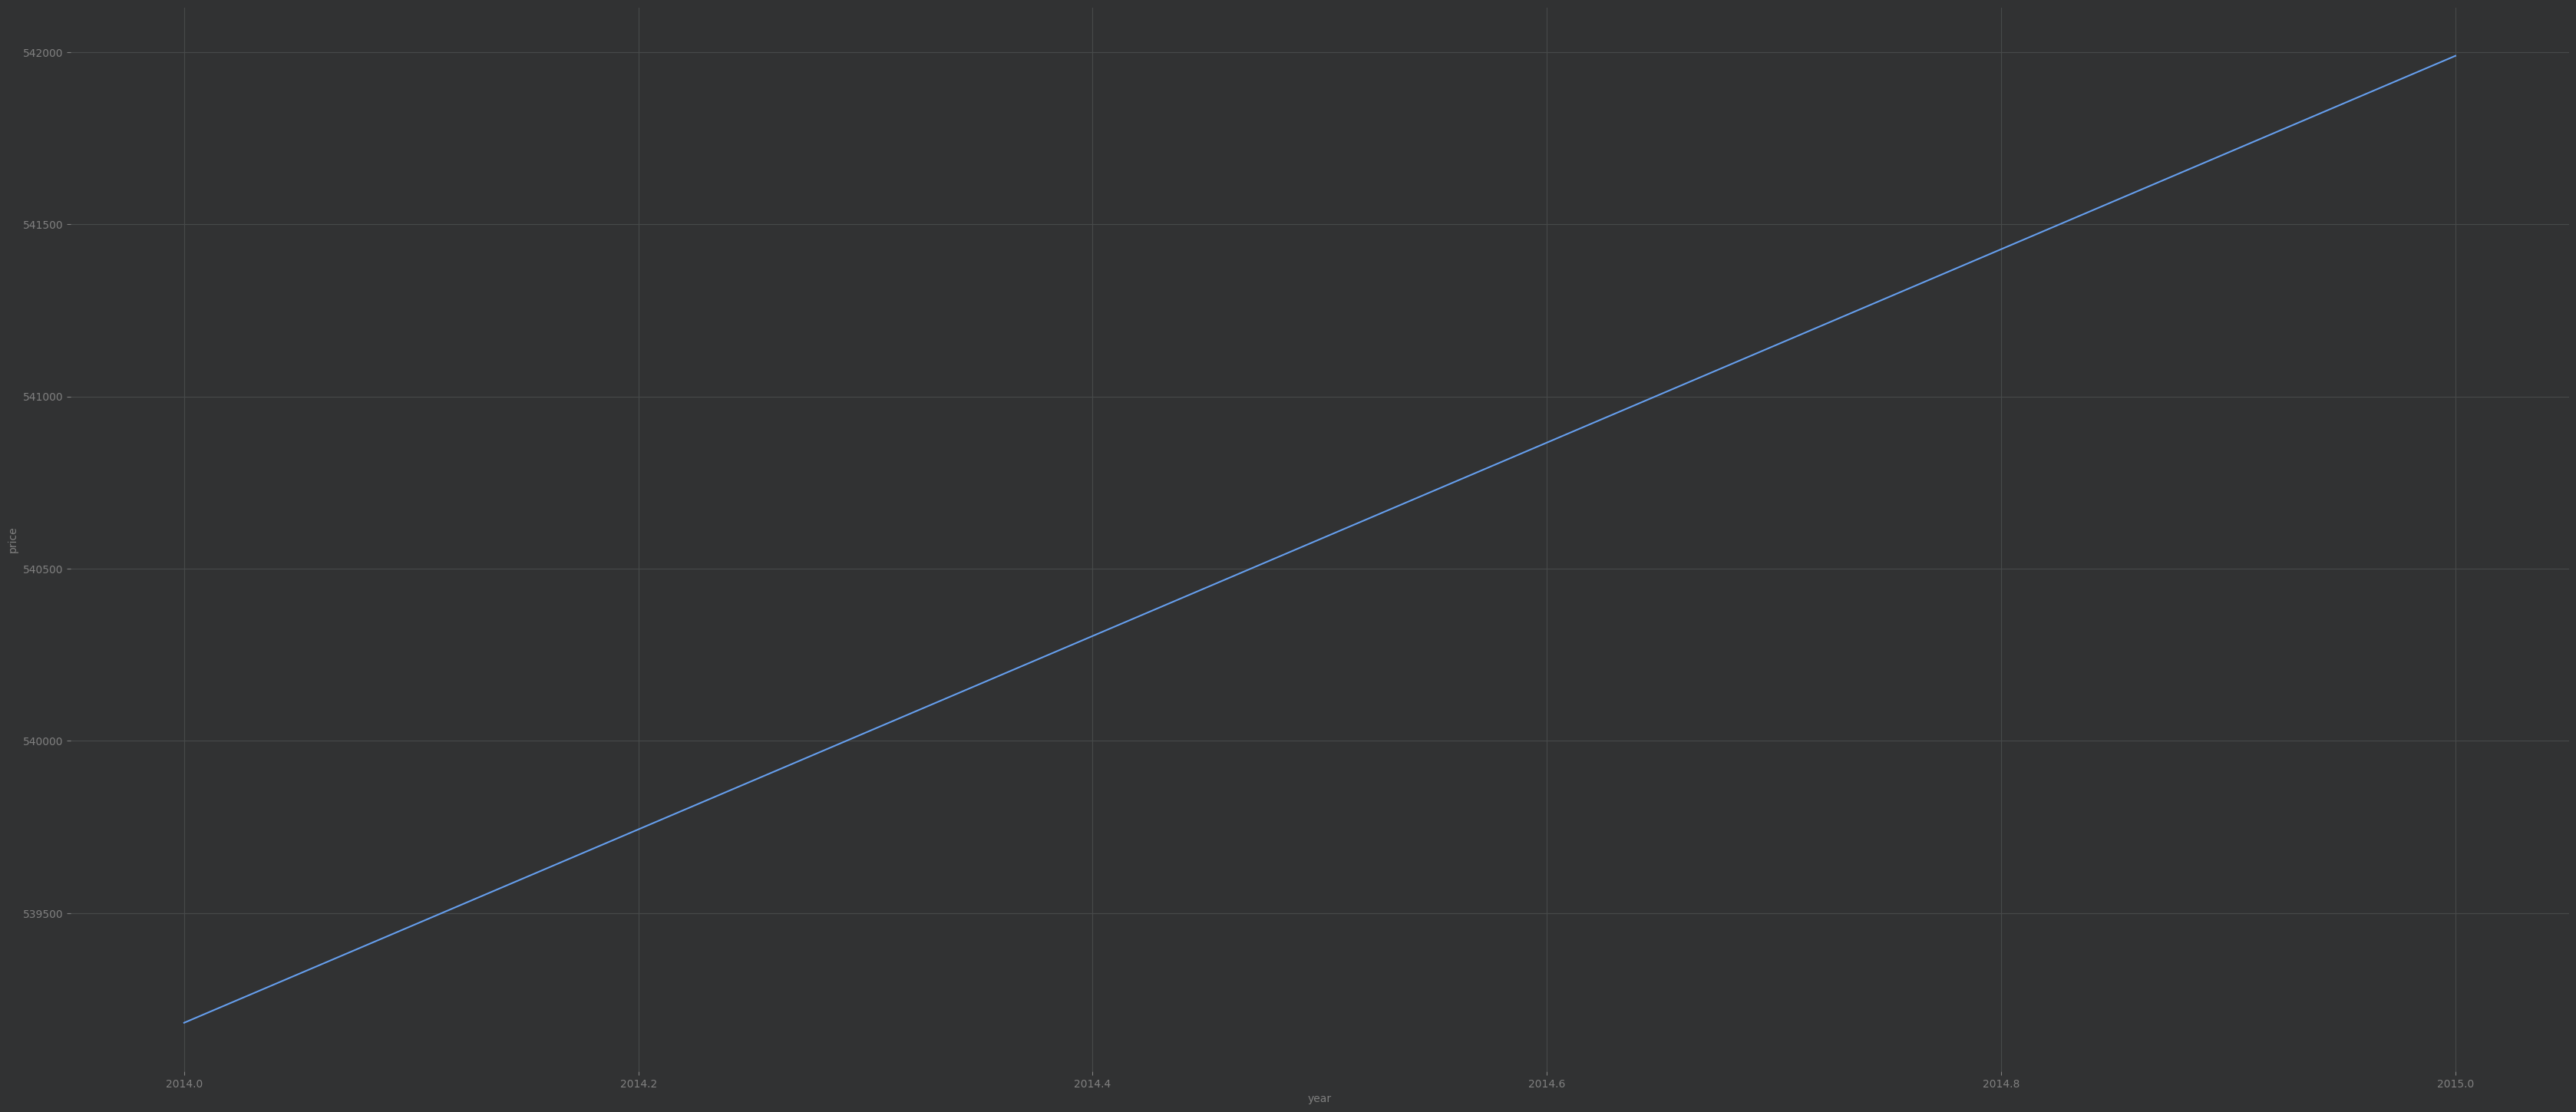

In [90]:
# plot price by year
line_plot_price_year = sns.lineplot(data=df.groupby('year').mean()['price'])
fig = line_plot_price_year.figure
fig.set_size_inches(42, 18)
plt.show()

In [92]:
# drop unnecessary features
df = df.drop(['date', 'zipcode', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront   
0  221900.0         3       1.00         1180      5650     1.0           0  \
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated  
0     0          3      7      1955             0  
1     0          3      7      1951          1991  
2     0          3      6      1933             0  
3     0          5      7      1965             0  
4     0          3      8      1987             0

# Neural Networks Model

In [93]:
# select feature price to predict it
X = df.drop('price', axis=1).values
y = df['price'].values

In [94]:
# split into train and test data, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15129, 11), (6484, 11), (15129,), (6484,))

In [95]:
# standardize data only on train data to prevent data leakege on test data
scaler = MinMaxScaler()

In [96]:
# perform the standardization and fitting process for X_train
X_train = scaler.fit_transform(X_train)
X_train

array([[0.12121212, 0.1875    , 0.08301887, ..., 0.5       , 0.56521739,
        0.        ],
       [0.09090909, 0.1875    , 0.08754717, ..., 0.5       , 0.53043478,
        0.        ],
       [0.15151515, 0.34375   , 0.19396226, ..., 0.66666667, 0.91304348,
        0.        ],
       ...,
       [0.09090909, 0.28125   , 0.15622642, ..., 0.66666667, 0.67826087,
        0.        ],
       [0.12121212, 0.25      , 0.15698113, ..., 0.58333333, 0.67826087,
        0.        ],
       [0.12121212, 0.28125   , 0.15773585, ..., 0.5       , 0.53043478,
        0.        ]])

In [97]:
# perform the standardization process for X_test to have them both standardized
X_test = scaler.transform(X_test)
X_test

array([[0.06060606, 0.1875    , 0.08603774, ..., 0.5       , 0.86086957,
        0.        ],
       [0.12121212, 0.40625   , 0.33056604, ..., 0.91666667, 0.76521739,
        0.        ],
       [0.06060606, 0.09375   , 0.08679245, ..., 0.5       , 0.12173913,
        0.        ],
       ...,
       [0.09090909, 0.3125    , 0.14037736, ..., 0.41666667, 0.69565217,
        0.99702233],
       [0.09090909, 0.21875   , 0.08981132, ..., 0.5       , 0.69565217,
        0.        ],
       [0.09090909, 0.125     , 0.07773585, ..., 0.5       , 0.59130435,
        0.        ]])

In [98]:
# build the model,19 neurons taken from the shape of data, the final output will predict the price which is only 1 neuron
nn_model = Sequential()

nn_model.add(Dense(19, activation='relu'))
nn_model.add(Dense(19, activation='relu'))
nn_model.add(Dense(19, activation='relu'))
nn_model.add(Dense(19, activation='relu'))
nn_model.add(Dense(1))

# take the right optimizer and loss based on the problem and using the right ones to solve it, adam in this case is a good choice  because we have a regression problem
nn_model.compile(optimizer='adam', loss="mse")

# train the model, 1 epoch means going 1 time through the entire dataset, large dataset that's why we use batches, small batch size means longer time but prevent overfitting
nn_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=100)

Epoch 1/100
119/119 [==============================] - 4s 7ms/step - loss: 425933963264.0000 - val_loss: 427585011712.0000
Epoch 2/100
119/119 [==============================] - 1s 6ms/step - loss: 424889384960.0000 - val_loss: 424137293824.0000
Epoch 3/100
119/119 [==============================] - 1s 5ms/step - loss: 411915976704.0000 - val_loss: 394730536960.0000
Epoch 4/100
119/119 [==============================] - 1s 5ms/step - loss: 349268901888.0000 - val_loss: 291596697600.0000
Epoch 5/100
119/119 [==============================] - 1s 6ms/step - loss: 214255304704.0000 - val_loss: 148283457536.0000
Epoch 6/100
119/119 [==============================] - 1s 6ms/step - loss: 115700260864.0000 - val_loss: 107650711552.0000
Epoch 7/100
119/119 [==============================] - 1s 5ms/step - loss: 101813526528.0000 - val_loss: 105818529792.0000
Epoch 8/100
119/119 [==============================] - 1s 7ms/step - loss: 100382466048.0000 - val_loss: 104644067328.0000
Epoch 9/100
119/

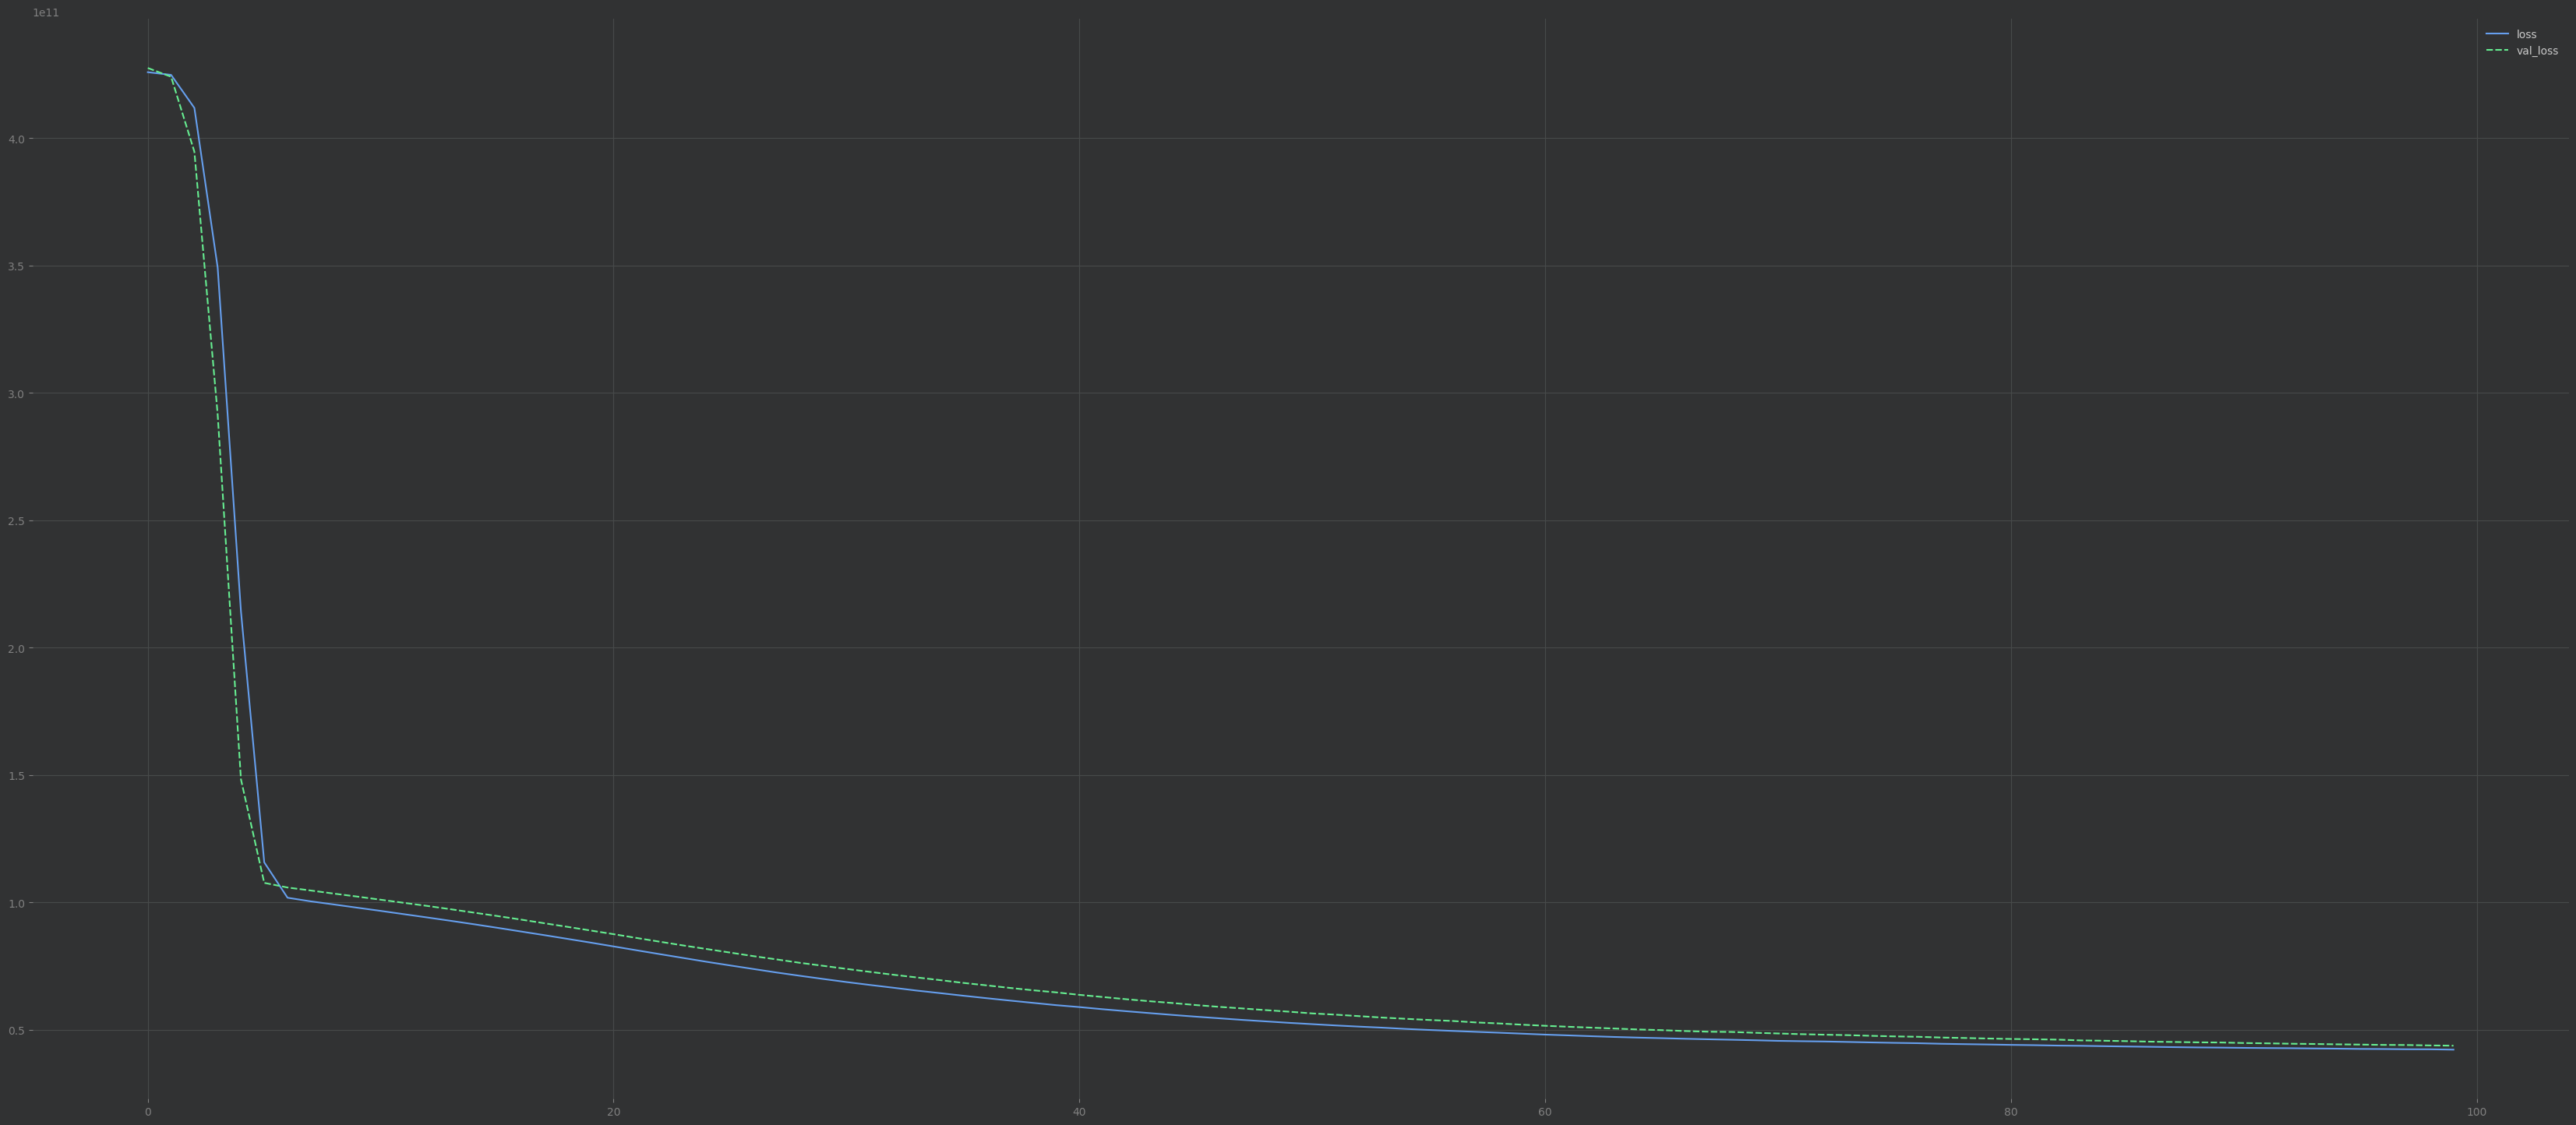

In [99]:
loss_df = pd.DataFrame(nn_model.history.history)

# plot the loss function
loss_plot = sns.lineplot(data=loss_df)
fig = loss_plot.figure
fig.set_size_inches(42, 18)
plt.show()

In [100]:
# predict using the model
predictions = nn_model.predict(X_test)
predictions

203/203 [==============================] - 1s 3ms/step


array([[ 313284.28],
       [1538988.6 ],
       [ 443477.84],
       ...,
       [ 357060.53],
       [ 321762.66],
       [ 313166.22]], dtype=float32)

In [101]:
# with how much we are off on average 
mean_absolute_error(y_test, predictions)

133652.33333614474

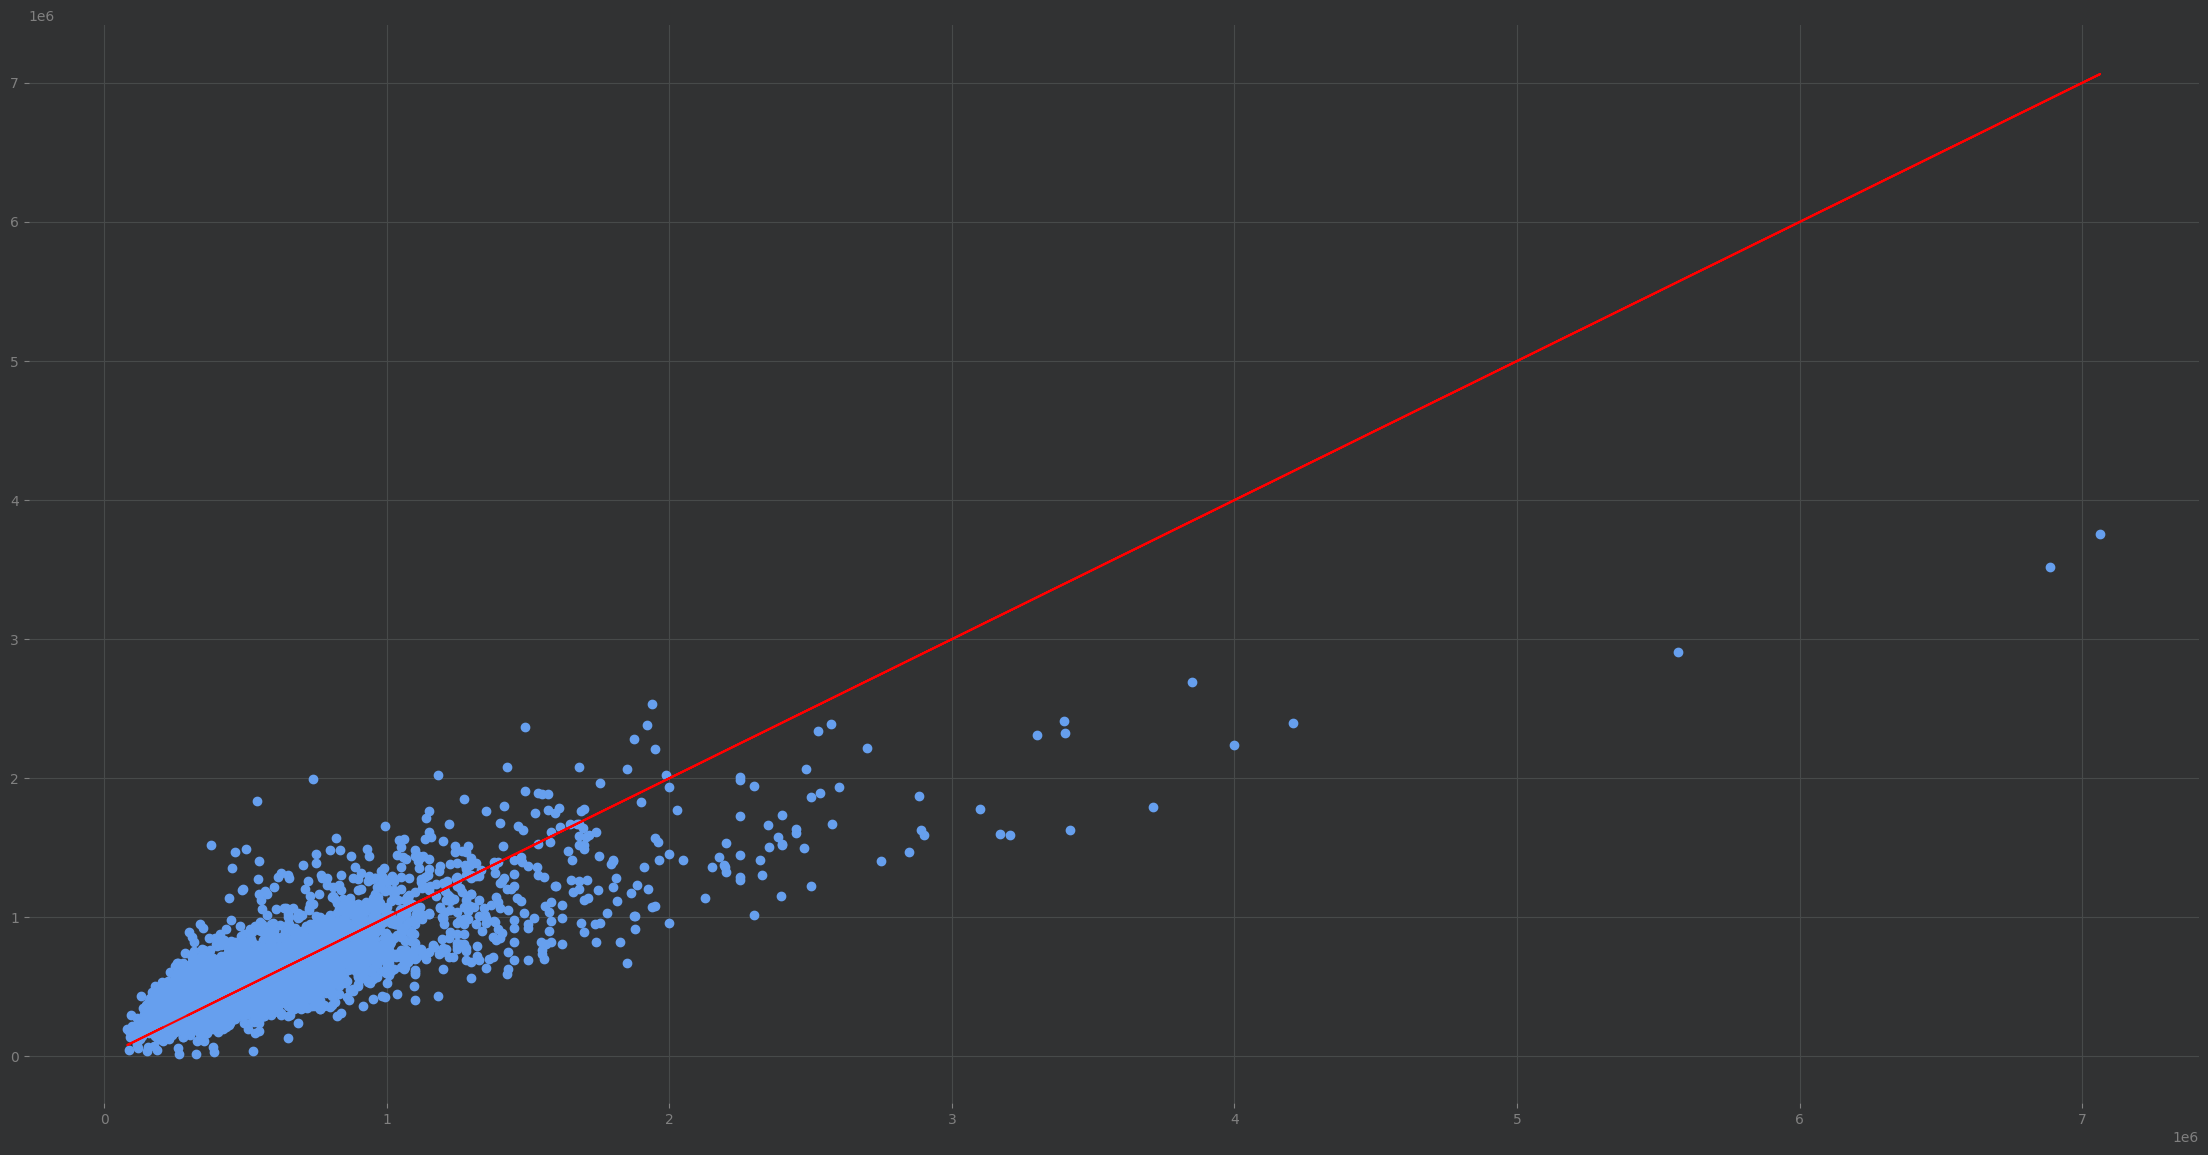

In [102]:
# plot the actual vs predicted values
plt.figure(figsize=(28, 14))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r')
plt.show()